In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import operator
import random

Declaração das Constantes

In [29]:
COLUMN_ROW = 5
SIZE_MATRIX = COLUMN_ROW * COLUMN_ROW
SIZE_POPULATION = 20

Gerando individuos aleatoriamente

In [3]:
individuals = np.random.randint(0,2,(SIZE_POPULATION, SIZE_MATRIX))
print(individuals)

[[1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1]
 [0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0]
 [1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1]
 [0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1]
 [1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0]
 [1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1]
 [0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1]
 [0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1]
 [1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0]
 [1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1]
 [1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0]
 [1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1]
 [1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0]
 [0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1]
 [0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1]
 [0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0]
 [0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 

Gerando genótipo aleatoriamente

Função para exibir amtrix de elementos

In [4]:
def plot_element(element, text):
    fig, ax = plt.subplots()
    matrix = element.reshape((COLUMN_ROW, COLUMN_ROW))
    im = ax.imshow(matrix)
    ax.set_title(text)
    fig.tight_layout()
    plt.show()

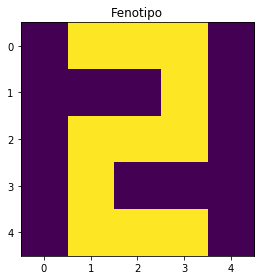

In [5]:
# genotype = np.random.randint(0,2, SIZE_MATRIX)
genotype = np.array([0,1,1,1,0,  0,0,0,1,0, 0,1,1,1,0,  0,1,0,0,0, 0,1,1,1,0])
plot_element(genotype, "Fenotipo")

Coparando os genes iguais

In [6]:
def generate_truth_table(individuals, genotype):
    return individuals == genotype

Somando para pegar os indivíduos com maior número de genes iguas

In [7]:
def sum_individuals (truth_table):
    return np.sum(truth_table, axis=1)

Gerando um dicionário para ordenar os elementos

In [8]:
def sort_individuals(sum_i):
    dic = {}
    for i in range(len(sum_i)):
        dic[i] = sum_i[i]

    return sorted(dic.items(), key=operator.itemgetter(1))

Algoritmo da roleta

In [9]:
def roulette(individuals, fitness):
    sum_fitness =  np.sum(fitness)
    new_individuals = individuals.copy()
    for i in range(SIZE_POPULATION):
        n = random.randint(0, sum_fitness)
        j = 0
        n = n - fitness[j]
        while n > 0 and j < (SIZE_POPULATION - 1):
            n = n - fitness[j]
            j = j + 1
            
        new_individuals[i] = individuals[j]
    
    return new_individuals

Função para determinar o ponto de corte

In [10]:
def new_court():
    percentage = random.randint(50, 60)
    return int(SIZE_MATRIX - (SIZE_MATRIX * percentage / 100))

Função de crossover

In [11]:
def crossover(individuals, sorted_d):
    i = 0
    while i < len(individuals):
        j = new_court()
        while j < SIZE_MATRIX:
            gene_parent_1 = individuals[sorted_d[i][0]][j]
            gene_parent_2 = individuals[sorted_d[i + 1][0]][j]
             
            individuals[sorted_d[i][0]][j] = gene_parent_2
            individuals[sorted_d[i + 1][0]][j] = gene_parent_1

            j += 1 


        i += 2
    return individuals



Função de mutação

In [ ]:
def mutation(individuals, mutation_rate):
    amount = int((SIZE_MATRIX * SIZE_POPULATION) * (mutation_rate / 100))
    for i in range(amount):
        x = random.randint(0, SIZE_POPULATION -1)
        n = random.randint(0, SIZE_MATRIX -1))
        individuals[x][n] = int(not individuals[x][n])
    return individuals

Algorítimo genético

In [55]:
def genetic_algorithm(individuals, genotype):
    truth_table = generate_truth_table(individuals, genotype)
    fitness = sum_individuals(truth_table)
    new_individuals = roulette(individuals, fitness)
    new_truth_table = generate_truth_table(new_individuals, genotype)
    new_fitness = sum_individuals(new_truth_table)    
    sorted_d = sort_individuals(new_fitness)
    new_individuals = crossover(new_individuals, sorted_d)
   
    return mutation(new_individuals, 2)

Verificar se existe o genótipo na lista de indivíduos

In [56]:
def exists_genotype_in_individuos(individuals, genotype):
    truth_table = generate_truth_table(individuals, genotype)
    sum_i = sum_individuals(truth_table)
    for i in range(SIZE_POPULATION):
        if(sum_i[i] == SIZE_MATRIX):
            return True, i
    else: return False

In [57]:
# list_individuals = []
count = 0

In [ ]:
new_individuals = genetic_algorithm(individuals, genotype)
exits_genotype = exists_genotype_in_individuos(new_individuals, genotype)
exits_genotype = False
while not exits_genotype:
    new_individuals = genetic_algorithm(new_individuals, genotype)
    exits_genotype = exists_genotype_in_individuos(new_individuals, genotype)
    count += 1
#     list_individuals.append(new_individuals.copy())

X 10
N 12
X 19
N 16
X 3
N 10
X 5
N 6
X 10
N 24
X 14
N 1
X 16
N 2
X 8
N 15
X 0
N 23
X 11
N 5
X 3
N 17
X 13
N 24
X 13
N 4
X 9
N 15
X 5
N 8
X 1
N 2
X 11
N 2
X 18
N 3
X 18
N 15
X 3
N 17
X 2
N 15
X 6
N 13
X 3
N 24
X 12
N 12
X 18
N 10
X 17
N 8
X 2
N 17
X 10
N 18
X 6
N 19
X 10
N 17
X 6
N 13
X 19
N 24
X 9
N 21
X 6
N 17
X 7
N 19
X 1
N 20
X 9
N 0
X 1
N 1
X 15
N 23
X 3
N 15
X 18
N 6
X 3
N 22
X 10
N 15
X 19
N 16
X 19
N 4
X 18
N 21
X 17
N 14
X 9
N 6
X 4
N 0
X 9
N 4
X 0
N 8
X 11
N 6
X 18
N 3
X 19
N 7
X 0
N 9
X 15
N 0
X 5
N 17
X 3
N 13
X 2
N 4
X 19
N 10
X 16
N 2
X 1
N 23
X 5
N 6
X 18
N 17
X 2
N 22
X 15
N 16
X 5
N 18
X 9
N 14
X 7
N 22
X 4
N 23
X 17
N 23
X 11
N 12
X 13
N 17
X 7
N 24
X 13
N 1
X 4
N 6
X 4
N 7
X 13
N 17
X 18
N 17
X 13
N 22
X 11
N 11
X 4
N 15
X 3
N 4
X 19
N 19
X 17
N 22
X 0
N 12
X 8
N 8
X 13
N 6
X 3
N 3
X 16
N 21
X 12
N 7
X 19
N 6
X 18
N 21
X 16
N 3
X 8
N 10
X 9
N 12
X 15
N 21
X 3
N 8
X 2
N 9
X 13
N 14
X 3
N 20
X 7
N 20
X 9
N 4
X 10
N 3
X 10
N 23
X 9
N 9
X 1
N 11
X 8
N 5
X 6
N 14
X 0
N 8
X

N 13
X 0
N 2
X 18
N 6
X 16
N 20
X 8
N 9
X 15
N 20
X 3
N 17
X 2
N 11
X 8
N 17
X 14
N 20
X 7
N 0
X 17
N 22
X 8
N 9
X 16
N 3
X 8
N 2
X 14
N 14
X 1
N 0
X 14
N 10
X 18
N 4
X 14
N 6
X 19
N 15
X 4
N 17
X 15
N 15
X 17
N 7
X 17
N 21
X 7
N 0
X 16
N 11
X 19
N 18
X 17
N 15
X 7
N 12
X 4
N 0
X 14
N 1
X 4
N 14
X 14
N 19
X 9
N 12
X 2
N 7
X 18
N 20
X 6
N 15
X 0
N 16
X 1
N 0
X 17
N 5
X 7
N 10
X 5
N 1
X 2
N 14
X 15
N 24
X 16
N 19
X 14
N 4
X 18
N 4
X 7
N 18
X 5
N 2
X 16
N 11
X 16
N 16
X 15
N 24
X 6
N 7
X 2
N 14
X 9
N 11
X 18
N 22
X 5
N 8
X 9
N 3
X 7
N 14
X 8
N 18
X 16
N 23
X 9
N 12
X 5
N 8
X 3
N 0
X 9
N 14
X 3
N 20
X 14
N 8
X 16
N 20
X 16
N 6
X 17
N 4
X 11
N 24
X 8
N 16
X 8
N 19
X 5
N 6
X 11
N 11
X 8
N 14
X 7
N 14
X 18
N 12
X 15
N 7
X 17
N 19
X 16
N 7
X 13
N 0
X 8
N 6
X 5
N 15
X 2
N 6
X 2
N 23
X 6
N 6
X 11
N 5
X 3
N 23
X 9
N 10
X 4
N 19
X 18
N 11
X 17
N 4
X 14
N 18
X 18
N 10
X 18
N 14
X 15
N 9
X 8
N 0
X 10
N 16
X 13
N 6
X 16
N 11
X 8
N 4
X 7
N 3
X 3
N 10
X 17
N 8
X 7
N 6
X 4
N 9
X 14
N 14
X 14
N 1
X 8
N 3

N 4
X 11
N 7
X 13
N 2
X 10
N 14
X 11
N 4
X 16
N 0
X 4
N 19
X 18
N 6
X 7
N 13
X 8
N 16
X 4
N 16
X 6
N 24
X 0
N 11
X 17
N 13
X 3
N 3
X 2
N 18
X 15
N 16
X 2
N 19
X 9
N 16
X 6
N 23
X 16
N 16
X 11
N 16
X 17
N 19
X 1
N 10
X 14
N 8
X 2
N 6
X 1
N 10
X 5
N 21
X 13
N 13
X 5
N 18
X 11
N 14
X 12
N 4
X 1
N 19
X 9
N 4
X 14
N 24
X 11
N 14
X 6
N 7
X 7
N 17
X 15
N 12
X 3
N 17
X 19
N 2
X 17
N 16
X 18
N 23
X 2
N 20
X 15
N 18
X 4
N 5
X 14
N 24
X 18
N 8
X 13
N 0
X 14
N 3
X 15
N 8
X 19
N 13
X 0
N 1
X 1
N 17
X 1
N 2
X 7
N 7
X 12
N 7
X 17
N 14
X 1
N 8
X 6
N 1
X 11
N 15
X 19
N 24
X 11
N 7
X 9
N 16
X 11
N 6
X 9
N 19
X 2
N 6
X 5
N 4
X 9
N 1
X 1
N 13
X 3
N 13
X 6
N 17
X 10
N 0
X 12
N 14
X 3
N 13
X 15
N 2
X 2
N 2
X 16
N 7
X 9
N 2
X 11
N 18
X 14
N 11
X 13
N 21
X 15
N 1
X 13
N 12
X 18
N 0
X 5
N 22
X 12
N 16
X 0
N 17
X 16
N 3
X 5
N 13
X 17
N 5
X 12
N 1
X 8
N 24
X 11
N 9
X 7
N 5
X 13
N 24
X 18
N 10
X 7
N 19
X 15
N 21
X 9
N 2
X 1
N 21
X 14
N 13
X 14
N 17
X 12
N 3
X 0
N 3
X 8
N 3
X 11
N 13
X 8
N 21
X 4
N 24
X 2
N 16
X 1

X 9
N 19
X 5
N 11
X 13
N 20
X 11
N 4
X 12
N 8
X 17
N 9
X 7
N 2
X 10
N 8
X 18
N 6
X 14
N 12
X 6
N 18
X 14
N 15
X 8
N 9
X 16
N 3
X 19
N 7
X 13
N 19
X 19
N 7
X 8
N 23
X 4
N 22
X 7
N 18
X 12
N 7
X 5
N 14
X 0
N 10
X 2
N 3
X 19
N 11
X 12
N 14
X 0
N 10
X 2
N 8
X 9
N 23
X 5
N 23
X 8
N 0
X 9
N 1
X 10
N 9
X 5
N 16
X 8
N 4
X 2
N 20
X 9
N 8
X 9
N 22
X 4
N 14
X 14
N 12
X 4
N 11
X 18
N 2
X 3
N 19
X 7
N 9
X 4
N 20
X 6
N 2
X 12
N 12
X 17
N 18
X 18
N 18
X 8
N 11
X 9
N 24
X 8
N 3
X 1
N 2
X 17
N 14
X 11
N 4
X 14
N 15
X 12
N 19
X 9
N 6
X 18
N 14
X 17
N 15
X 19
N 16
X 3
N 18
X 0
N 1
X 9
N 17
X 4
N 23
X 6
N 18
X 19
N 11
X 1
N 16
X 14
N 7
X 6
N 10
X 18
N 15
X 13
N 3
X 15
N 10
X 16
N 20
X 16
N 11
X 15
N 24
X 3
N 12
X 8
N 21
X 14
N 0
X 8
N 24
X 2
N 9
X 9
N 4
X 16
N 24
X 11
N 22
X 3
N 6
X 0
N 12
X 9
N 5
X 5
N 16
X 4
N 19
X 3
N 4
X 10
N 22
X 5
N 16
X 12
N 24
X 5
N 10
X 1
N 18
X 16
N 22
X 8
N 21
X 12
N 12
X 19
N 12
X 8
N 1
X 11
N 11
X 0
N 24
X 18
N 2
X 1
N 13
X 9
N 2
X 2
N 5
X 5
N 4
X 18
N 1
X 6
N 21
X 16
N 23
X 

X 11
N 21
X 15
N 1
X 10
N 10
X 15
N 4
X 9
N 21
X 19
N 21
X 17
N 15
X 12
N 15
X 14
N 2
X 6
N 17
X 11
N 18
X 2
N 9
X 9
N 15
X 14
N 12
X 12
N 18
X 16
N 12
X 5
N 3
X 13
N 10
X 4
N 10
X 11
N 17
X 5
N 8
X 14
N 23
X 14
N 15
X 6
N 2
X 18
N 7
X 6
N 0
X 10
N 8
X 5
N 24
X 13
N 6
X 19
N 4
X 15
N 14
X 8
N 18
X 15
N 8
X 0
N 23
X 11
N 1
X 0
N 17
X 7
N 19
X 2
N 4
X 18
N 16
X 19
N 10
X 17
N 2
X 10
N 4
X 10
N 22
X 16
N 13
X 5
N 22
X 14
N 4
X 9
N 19
X 1
N 9
X 12
N 16
X 7
N 5
X 11
N 13
X 13
N 12
X 16
N 10
X 2
N 13
X 16
N 23
X 10
N 0
X 7
N 15
X 16
N 10
X 8
N 20
X 14
N 8
X 18
N 2
X 19
N 23
X 8
N 13
X 6
N 14
X 19
N 9
X 13
N 8
X 18
N 16
X 0
N 24
X 2
N 4
X 14
N 2
X 10
N 7
X 10
N 4
X 15
N 19
X 6
N 12
X 17
N 18
X 12
N 23
X 0
N 9
X 1
N 5
X 6
N 10
X 11
N 21
X 17
N 0
X 5
N 23
X 7
N 12
X 6
N 5
X 10
N 22
X 16
N 11
X 2
N 15
X 15
N 2
X 2
N 13
X 1
N 4
X 8
N 16
X 16
N 24
X 18
N 5
X 10
N 22
X 0
N 5
X 11
N 3
X 9
N 12
X 10
N 7
X 6
N 22
X 6
N 7
X 9
N 4
X 3
N 4
X 10
N 11
X 3
N 6
X 16
N 10
X 2
N 8
X 0
N 2
X 9
N 17
X 0
N 14
X 7

X 2
N 23
X 6
N 0
X 10
N 0
X 9
N 7
X 6
N 23
X 16
N 18
X 17
N 4
X 18
N 2
X 10
N 3
X 9
N 14
X 2
N 14
X 3
N 19
X 3
N 21
X 9
N 23
X 18
N 6
X 19
N 5
X 17
N 1
X 7
N 10
X 7
N 6
X 13
N 11
X 13
N 2
X 9
N 6
X 11
N 13
X 11
N 3
X 6
N 12
X 0
N 12
X 11
N 16
X 0
N 2
X 17
N 15
X 7
N 9
X 10
N 13
X 3
N 14
X 1
N 8
X 15
N 18
X 10
N 12
X 5
N 17
X 9
N 16
X 9
N 24
X 18
N 13
X 16
N 16
X 2
N 0
X 14
N 17
X 4
N 19
X 9
N 11
X 0
N 4
X 1
N 1
X 18
N 14
X 7
N 1
X 15
N 1
X 3
N 8
X 5
N 3
X 7
N 9
X 6
N 5
X 3
N 11
X 10
N 5
X 11
N 18
X 12
N 3
X 14
N 3
X 14
N 2
X 5
N 21
X 9
N 23
X 8
N 24
X 6
N 10
X 2
N 2
X 11
N 8
X 9
N 8
X 14
N 18
X 0
N 14
X 10
N 17
X 5
N 17
X 1
N 20
X 9
N 9
X 11
N 2
X 10
N 0
X 3
N 19
X 7
N 0
X 9
N 24
X 10
N 4
X 13
N 21
X 7
N 1
X 15
N 11
X 16
N 5
X 18
N 19
X 6
N 10
X 5
N 20
X 2
N 14
X 13
N 11
X 4
N 12
X 14
N 12
X 18
N 12
X 15
N 13
X 12
N 14
X 11
N 22
X 17
N 5
X 13
N 11
X 1
N 8
X 10
N 0
X 8
N 2
X 4
N 8
X 17
N 2
X 5
N 6
X 3
N 9
X 5
N 20
X 19
N 17
X 3
N 19
X 5
N 15
X 7
N 19
X 17
N 4
X 1
N 3
X 15
N 14
X 11
N 15

N 1
X 5
N 16
X 1
N 6
X 1
N 4
X 19
N 21
X 6
N 14
X 17
N 12
X 8
N 6
X 11
N 20
X 14
N 24
X 19
N 12
X 15
N 0
X 3
N 10
X 12
N 24
X 11
N 5
X 14
N 5
X 1
N 13
X 9
N 12
X 18
N 16
X 5
N 2
X 17
N 16
X 1
N 4
X 5
N 5
X 15
N 0
X 13
N 7
X 14
N 7
X 15
N 13
X 16
N 0
X 3
N 24
X 17
N 21
X 11
N 14
X 13
N 4
X 0
N 18
X 3
N 24
X 16
N 8
X 14
N 1
X 11
N 19
X 12
N 17
X 18
N 14
X 0
N 22
X 17
N 7
X 14
N 18
X 19
N 17
X 11
N 10
X 12
N 0
X 0
N 12
X 15
N 6
X 7
N 9
X 7
N 18
X 10
N 0
X 18
N 20
X 12
N 21
X 1
N 7
X 14
N 4
X 1
N 7
X 19
N 24
X 9
N 6
X 10
N 15
X 2
N 13
X 6
N 0
X 11
N 4
X 17
N 22
X 7
N 23
X 5
N 17
X 4
N 3
X 13
N 7
X 17
N 5
X 1
N 12
X 13
N 7
X 17
N 5
X 10
N 8
X 11
N 9
X 16
N 1
X 5
N 20
X 12
N 14
X 9
N 5
X 9
N 18
X 11
N 1
X 18
N 10
X 17
N 15
X 15
N 21
X 12
N 9
X 8
N 15
X 13
N 13
X 6
N 17
X 11
N 21
X 3
N 12
X 17
N 14
X 3
N 12
X 19
N 23
X 10
N 19
X 5
N 20
X 10
N 11
X 9
N 18
X 3
N 2
X 16
N 13
X 18
N 24
X 9
N 16
X 4
N 9
X 13
N 1
X 5
N 23
X 12
N 16
X 14
N 9
X 3
N 10
X 0
N 22
X 12
N 13
X 1
N 23
X 19
N 7
X 18
N 7
X 1

N 17
X 18
N 7
X 17
N 5
X 6
N 6
X 0
N 1
X 3
N 19
X 19
N 14
X 9
N 12
X 6
N 5
X 9
N 19
X 17
N 24
X 7
N 16
X 7
N 5
X 5
N 12
X 6
N 8
X 2
N 5
X 0
N 20
X 19
N 21
X 16
N 22
X 16
N 11
X 17
N 7
X 12
N 10
X 7
N 1
X 12
N 3
X 6
N 17
X 16
N 17
X 12
N 16
X 3
N 12
X 11
N 5
X 1
N 19
X 4
N 17
X 15
N 14
X 5
N 24
X 16
N 16
X 4
N 15
X 13
N 24
X 10
N 5
X 18
N 13
X 19
N 8
X 4
N 13
X 8
N 7
X 1
N 18
X 12
N 2
X 6
N 21
X 10
N 20
X 19
N 5
X 15
N 18
X 15
N 9
X 2
N 8
X 9
N 4
X 15
N 9
X 1
N 6
X 10
N 7
X 13
N 15
X 4
N 24
X 1
N 15
X 4
N 5
X 19
N 23
X 17
N 14
X 18
N 19
X 17
N 19
X 18
N 8
X 14
N 7
X 17
N 24
X 18
N 22
X 4
N 19
X 7
N 13
X 18
N 19
X 16
N 14
X 17
N 14
X 17
N 24
X 4
N 5
X 13
N 6
X 14
N 21
X 4
N 6
X 18
N 3
X 3
N 2
X 2
N 9
X 7
N 6
X 4
N 9
X 1
N 22
X 14
N 6
X 18
N 21
X 19
N 14
X 9
N 16
X 0
N 5
X 17
N 15
X 13
N 7
X 15
N 15
X 14
N 4
X 11
N 20
X 17
N 9
X 12
N 20
X 19
N 5
X 5
N 23
X 16
N 0
X 9
N 2
X 16
N 13
X 4
N 2
X 19
N 12
X 15
N 18
X 19
N 4
X 19
N 3
X 14
N 9
X 0
N 11
X 3
N 2
X 0
N 16
X 15
N 5
X 8
N 24
X 2
N 5
X 

N 8
X 4
N 16
X 16
N 14
X 17
N 19
X 12
N 8
X 12
N 7
X 19
N 7
X 9
N 10
X 6
N 3
X 4
N 13
X 5
N 5
X 17
N 14
X 9
N 20
X 10
N 8
X 10
N 17
X 12
N 7
X 3
N 15
X 17
N 2
X 17
N 14
X 2
N 10
X 15
N 13
X 6
N 24
X 2
N 17
X 10
N 11
X 17
N 12
X 2
N 16
X 7
N 11
X 1
N 9
X 13
N 7
X 12
N 23
X 7
N 13
X 7
N 21
X 4
N 9
X 16
N 18
X 0
N 14
X 10
N 10
X 3
N 3
X 13
N 16
X 1
N 11
X 4
N 14
X 4
N 9
X 17
N 14
X 15
N 8
X 7
N 23
X 9
N 11
X 10
N 7
X 19
N 20
X 2
N 24
X 16
N 24
X 2
N 8
X 0
N 23
X 17
N 11
X 10
N 11
X 10
N 23
X 17
N 22
X 17
N 6
X 7
N 14
X 14
N 0
X 8
N 18
X 12
N 20
X 18
N 11
X 15
N 8
X 3
N 23
X 3
N 23
X 18
N 4
X 9
N 2
X 14
N 6
X 19
N 16
X 11
N 22
X 3
N 22
X 12
N 5
X 11
N 13
X 12
N 21
X 15
N 20
X 8
N 8
X 6
N 12
X 13
N 3
X 19
N 21
X 3
N 22
X 12
N 0
X 19
N 11
X 11
N 14
X 18
N 1
X 3
N 0
X 18
N 18
X 14
N 5
X 11
N 18
X 17
N 18
X 18
N 13
X 3
N 1
X 12
N 2
X 11
N 12
X 1
N 11
X 18
N 7
X 10
N 14
X 16
N 1
X 10
N 16
X 8
N 14
X 14
N 8
X 14
N 11
X 0
N 20
X 2
N 9
X 3
N 16
X 14
N 18
X 6
N 0
X 9
N 1
X 10
N 14
X 2
N 3
X 2
N 3
X

X 11
N 18
X 4
N 15
X 2
N 10
X 19
N 19
X 14
N 22
X 13
N 12
X 14
N 14
X 13
N 0
X 15
N 7
X 15
N 14
X 19
N 5
X 12
N 21
X 10
N 17
X 18
N 8
X 1
N 9
X 8
N 20
X 6
N 10
X 14
N 18
X 11
N 20
X 17
N 11
X 1
N 3
X 6
N 2
X 5
N 8
X 15
N 4
X 6
N 20
X 19
N 18
X 2
N 13
X 3
N 23
X 4
N 17
X 4
N 19
X 2
N 9
X 9
N 1
X 9
N 17
X 17
N 20
X 16
N 12
X 13
N 22
X 4
N 16
X 9
N 11
X 7
N 21
X 14
N 21
X 5
N 4
X 15
N 7
X 1
N 2
X 0
N 5
X 15
N 24
X 14
N 22
X 9
N 6
X 11
N 21
X 10
N 8
X 2
N 4
X 3
N 13
X 14
N 17
X 4
N 14
X 11
N 24
X 1
N 22
X 18
N 19
X 17
N 1
X 7
N 12
X 9
N 15
X 17
N 1
X 18
N 19
X 3
N 22
X 3
N 4
X 14
N 23
X 3
N 7
X 5
N 4
X 0
N 4
X 3
N 19
X 2
N 10
X 19
N 3
X 14
N 10
X 11
N 3
X 7
N 1
X 5
N 19
X 12
N 24
X 1
N 2
X 14
N 3
X 16
N 4
X 14
N 24
X 14
N 23
X 3
N 20
X 18
N 1
X 10
N 5
X 14
N 16
X 0
N 16
X 0
N 9
X 4
N 21
X 12
N 18
X 14
N 5
X 4
N 3
X 6
N 1
X 2
N 23
X 1
N 18
X 3
N 14
X 11
N 6
X 9
N 19
X 12
N 1
X 13
N 1
X 4
N 19
X 6
N 18
X 6
N 0
X 17
N 18
X 11
N 19
X 10
N 21
X 2
N 1
X 14
N 24
X 5
N 11
X 12
N 22
X 8
N 11
X 12
N

X 7
N 1
X 15
N 23
X 3
N 1
X 1
N 14
X 11
N 5
X 8
N 13
X 9
N 3
X 17
N 15
X 1
N 9
X 6
N 1
X 10
N 18
X 12
N 10
X 15
N 15
X 9
N 7
X 5
N 10
X 15
N 24
X 7
N 13
X 8
N 0
X 4
N 15
X 4
N 20
X 3
N 19
X 9
N 19
X 16
N 7
X 17
N 15
X 9
N 1
X 0
N 20
X 10
N 16
X 15
N 24
X 2
N 3
X 3
N 7
X 15
N 16
X 8
N 9
X 6
N 4
X 9
N 3
X 15
N 20
X 13
N 15
X 11
N 14
X 3
N 14
X 3
N 8
X 2
N 24
X 11
N 1
X 15
N 11
X 17
N 1
X 19
N 18
X 4
N 18
X 10
N 4
X 14
N 21
X 8
N 9
X 15
N 8
X 19
N 17
X 6
N 16
X 4
N 19
X 14
N 12
X 13
N 15
X 3
N 20
X 7
N 11
X 4
N 17
X 2
N 18
X 3
N 19
X 18
N 14
X 8
N 0
X 4
N 0
X 17
N 3
X 8
N 12
X 15
N 18
X 3
N 14
X 1
N 9
X 3
N 10
X 13
N 14
X 11
N 1
X 12
N 1
X 2
N 19
X 3
N 18
X 5
N 15
X 7
N 9
X 10
N 17
X 8
N 9
X 0
N 1
X 0
N 1
X 11
N 3
X 12
N 15
X 10
N 14
X 9
N 8
X 14
N 9
X 7
N 18
X 16
N 10
X 15
N 1
X 7
N 18
X 2
N 14
X 15
N 8
X 0
N 17
X 13
N 16
X 17
N 16
X 5
N 5
X 2
N 3
X 11
N 2
X 15
N 15
X 9
N 6
X 13
N 4
X 17
N 11
X 11
N 0
X 1
N 23
X 5
N 10
X 17
N 9
X 4
N 5
X 6
N 5
X 19
N 3
X 19
N 12
X 0
N 7
X 12
N 8
X 6
N 10

X 0
N 16
X 0
N 2
X 0
N 14
X 13
N 10
X 14
N 4
X 12
N 3
X 2
N 12
X 17
N 2
X 5
N 19
X 14
N 9
X 2
N 6
X 15
N 13
X 6
N 8
X 19
N 19
X 4
N 1
X 19
N 18
X 17
N 17
X 2
N 5
X 15
N 18
X 1
N 2
X 13
N 1
X 6
N 11
X 18
N 9
X 15
N 2
X 6
N 4
X 13
N 11
X 2
N 19
X 15
N 20
X 2
N 1
X 11
N 21
X 1
N 1
X 2
N 3
X 4
N 1
X 16
N 1
X 8
N 16
X 5
N 3
X 0
N 18
X 2
N 12
X 5
N 23
X 2
N 24
X 15
N 2
X 17
N 24
X 3
N 14
X 10
N 13
X 17
N 20
X 16
N 11
X 19
N 19
X 11
N 10
X 15
N 16
X 8
N 20
X 10
N 9
X 15
N 5
X 1
N 7
X 4
N 10
X 7
N 22
X 7
N 9
X 3
N 5
X 14
N 15
X 18
N 16
X 0
N 21
X 17
N 5
X 9
N 18
X 4
N 1
X 4
N 13
X 10
N 6
X 5
N 3
X 9
N 8
X 6
N 5
X 17
N 1
X 0
N 13
X 19
N 8
X 3
N 22
X 19
N 11
X 9
N 12
X 14
N 7
X 14
N 5
X 13
N 2
X 16
N 2
X 17
N 5
X 18
N 14
X 17
N 5
X 17
N 11
X 15
N 16
X 16
N 10
X 10
N 6
X 13
N 6
X 8
N 23
X 3
N 10
X 17
N 21
X 2
N 23
X 12
N 15
X 8
N 23
X 14
N 20
X 12
N 16
X 2
N 10
X 6
N 0
X 4
N 22
X 9
N 19
X 3
N 23
X 11
N 4
X 16
N 10
X 15
N 21
X 6
N 1
X 11
N 11
X 19
N 14
X 8
N 0
X 9
N 14
X 10
N 19
X 10
N 22
X 6
N 16

X 1
N 9
X 7
N 16
X 18
N 16
X 16
N 22
X 2
N 20
X 10
N 14
X 16
N 9
X 2
N 20
X 1
N 3
X 4
N 9
X 6
N 24
X 19
N 6
X 5
N 6
X 2
N 14
X 10
N 0
X 15
N 21
X 8
N 15
X 18
N 17
X 2
N 4
X 5
N 9
X 12
N 10
X 7
N 21
X 4
N 11
X 11
N 17
X 9
N 14
X 18
N 20
X 18
N 2
X 7
N 14
X 10
N 13
X 17
N 11
X 1
N 9
X 11
N 5
X 0
N 11
X 5
N 18
X 2
N 22
X 18
N 24
X 8
N 15
X 18
N 21
X 2
N 5
X 5
N 11
X 11
N 9
X 0
N 19
X 4
N 7
X 1
N 20
X 0
N 11
X 3
N 19
X 5
N 11
X 5
N 12
X 9
N 4
X 5
N 14
X 18
N 20
X 9
N 16
X 10
N 22
X 4
N 16
X 7
N 5
X 10
N 19
X 6
N 2
X 9
N 1
X 11
N 21
X 4
N 8
X 12
N 6
X 7
N 18
X 0
N 24
X 10
N 18
X 6
N 22
X 13
N 7
X 14
N 9
X 11
N 6
X 5
N 10
X 9
N 11
X 5
N 19
X 8
N 3
X 6
N 24
X 18
N 21
X 1
N 4
X 11
N 1
X 3
N 8
X 16
N 11
X 4
N 2
X 4
N 3
X 17
N 19
X 3
N 11
X 8
N 18
X 19
N 19
X 14
N 18
X 1
N 19
X 19
N 22
X 14
N 11
X 10
N 20
X 18
N 18
X 13
N 17
X 0
N 18
X 9
N 2
X 18
N 12
X 1
N 24
X 0
N 6
X 10
N 11
X 18
N 7
X 3
N 19
X 3
N 11
X 18
N 24
X 13
N 21
X 15
N 11
X 12
N 11
X 15
N 1
X 16
N 18
X 13
N 20
X 13
N 0
X 15
N 6
X 15


X 17
N 18
X 12
N 10
X 16
N 8
X 13
N 7
X 13
N 9
X 7
N 17
X 0
N 15
X 5
N 24
X 0
N 9
X 17
N 0
X 13
N 16
X 17
N 2
X 6
N 12
X 3
N 16
X 7
N 14
X 3
N 12
X 8
N 13
X 18
N 14
X 13
N 16
X 14
N 11
X 6
N 15
X 3
N 12
X 9
N 5
X 10
N 15
X 6
N 10
X 16
N 9
X 11
N 14
X 13
N 12
X 19
N 21
X 19
N 2
X 2
N 2
X 12
N 6
X 17
N 5
X 3
N 10
X 4
N 24
X 1
N 22
X 3
N 1
X 1
N 1
X 12
N 21
X 5
N 22
X 18
N 5
X 18
N 10
X 2
N 7
X 9
N 10
X 17
N 0
X 16
N 23
X 3
N 16
X 16
N 3
X 8
N 11
X 5
N 1
X 9
N 0
X 14
N 12
X 19
N 13
X 17
N 1
X 16
N 20
X 14
N 22
X 3
N 1
X 7
N 12
X 11
N 22
X 13
N 8
X 5
N 9
X 5
N 23
X 7
N 6
X 7
N 2
X 16
N 14
X 6
N 7
X 18
N 15
X 3
N 18
X 2
N 18
X 0
N 8
X 12
N 22
X 14
N 19
X 18
N 0
X 12
N 12
X 14
N 3
X 13
N 2
X 14
N 12
X 15
N 24
X 10
N 5
X 8
N 9
X 0
N 7
X 19
N 2
X 5
N 3
X 0
N 20
X 10
N 3
X 19
N 9
X 9
N 12
X 2
N 2
X 19
N 8
X 12
N 23
X 4
N 17
X 15
N 18
X 5
N 1
X 15
N 23
X 10
N 6
X 5
N 11
X 3
N 9
X 12
N 17
X 0
N 17
X 9
N 9
X 1
N 24
X 19
N 15
X 10
N 18
X 13
N 4
X 18
N 4
X 12
N 14
X 8
N 2
X 12
N 0
X 8
N 4
X 2
N 19
X

N 12
X 8
N 3
X 4
N 0
X 14
N 14
X 4
N 23
X 8
N 22
X 10
N 16
X 12
N 18
X 0
N 14
X 2
N 19
X 13
N 18
X 0
N 8
X 13
N 5
X 7
N 12
X 13
N 4
X 18
N 14
X 19
N 17
X 15
N 24
X 2
N 8
X 16
N 13
X 7
N 5
X 13
N 4
X 2
N 24
X 13
N 11
X 11
N 18
X 11
N 12
X 13
N 5
X 12
N 12
X 13
N 18
X 19
N 22
X 1
N 19
X 4
N 7
X 0
N 4
X 3
N 1
X 18
N 22
X 4
N 1
X 12
N 22
X 3
N 1
X 17
N 3
X 0
N 14
X 14
N 3
X 17
N 9
X 2
N 17
X 12
N 11
X 1
N 16
X 13
N 3
X 0
N 15
X 19
N 10
X 14
N 20
X 18
N 21
X 19
N 20
X 15
N 5
X 8
N 11
X 17
N 3
X 5
N 22
X 0
N 9
X 5
N 1
X 14
N 20
X 12
N 3
X 1
N 9
X 0
N 5
X 12
N 14
X 13
N 12
X 5
N 19
X 1
N 24
X 7
N 23
X 19
N 9
X 15
N 13
X 18
N 9
X 1
N 10
X 10
N 20
X 2
N 10
X 14
N 12
X 2
N 2
X 0
N 20
X 0
N 10
X 18
N 19
X 1
N 0
X 15
N 2
X 16
N 1
X 7
N 21
X 3
N 2
X 6
N 19
X 3
N 20
X 2
N 21
X 9
N 5
X 9
N 3
X 0
N 8
X 1
N 15
X 12
N 17
X 0
N 10
X 1
N 17
X 5
N 4
X 4
N 11
X 1
N 23
X 0
N 11
X 14
N 21
X 6
N 23
X 8
N 17
X 0
N 11
X 8
N 24
X 15
N 23
X 13
N 5
X 8
N 20
X 8
N 24
X 17
N 20
X 8
N 6
X 9
N 3
X 9
N 23
X 4
N 4
X 9
N 

N 24
X 18
N 7
X 0
N 11
X 0
N 1
X 1
N 1
X 15
N 6
X 3
N 11
X 0
N 23
X 15
N 11
X 3
N 19
X 15
N 21
X 0
N 0
X 16
N 5
X 13
N 16
X 13
N 16
X 6
N 11
X 7
N 18
X 16
N 13
X 14
N 22
X 7
N 22
X 8
N 5
X 13
N 22
X 5
N 17
X 17
N 16
X 19
N 11
X 12
N 20
X 11
N 3
X 6
N 22
X 10
N 7
X 16
N 19
X 3
N 17
X 6
N 19
X 9
N 22
X 10
N 8
X 9
N 20
X 10
N 22
X 19
N 5
X 18
N 4
X 11
N 6
X 12
N 4
X 17
N 18
X 16
N 18
X 1
N 11
X 14
N 5
X 17
N 1
X 7
N 8
X 4
N 15
X 14
N 12
X 17
N 23
X 13
N 9
X 0
N 21
X 16
N 6
X 11
N 17
X 19
N 3
X 8
N 23
X 8
N 21
X 10
N 17
X 11
N 23
X 8
N 11
X 1
N 18
X 11
N 23
X 9
N 2
X 3
N 12
X 14
N 12
X 9
N 15
X 16
N 12
X 18
N 8
X 6
N 20
X 0
N 24
X 10
N 14
X 17
N 22
X 18
N 3
X 8
N 22
X 6
N 1
X 3
N 21
X 19
N 12
X 19
N 13
X 8
N 22
X 5
N 9
X 7
N 24
X 14
N 19
X 18
N 8
X 1
N 18
X 16
N 5
X 0
N 5
X 10
N 11
X 8
N 5
X 1
N 10
X 14
N 5
X 12
N 22
X 11
N 5
X 14
N 20
X 15
N 21
X 15
N 7
X 11
N 19
X 11
N 20
X 13
N 14
X 14
N 23
X 14
N 21
X 0
N 5
X 6
N 5
X 0
N 7
X 14
N 18
X 16
N 5
X 2
N 12
X 14
N 12
X 4
N 11
X 6
N 17
X 12
N 

N 11
X 4
N 18
X 17
N 19
X 14
N 22
X 9
N 5
X 0
N 14
X 1
N 5
X 19
N 4
X 6
N 9
X 13
N 9
X 7
N 24
X 10
N 21
X 2
N 18
X 9
N 4
X 1
N 16
X 5
N 7
X 18
N 7
X 15
N 7
X 11
N 11
X 3
N 5
X 6
N 19
X 8
N 24
X 16
N 4
X 2
N 15
X 9
N 13
X 18
N 11
X 6
N 0
X 15
N 19
X 6
N 1
X 8
N 13
X 16
N 7
X 18
N 7
X 5
N 14
X 5
N 20
X 14
N 6
X 13
N 9
X 0
N 5
X 7
N 6
X 3
N 9
X 15
N 23
X 8
N 19
X 2
N 2
X 12
N 4
X 9
N 13
X 9
N 17
X 17
N 1
X 19
N 14
X 8
N 18
X 7
N 16
X 15
N 10
X 18
N 21
X 7
N 10
X 19
N 0
X 17
N 6
X 10
N 13
X 11
N 23
X 13
N 12
X 16
N 19
X 15
N 9
X 7
N 16
X 19
N 5
X 7
N 3
X 8
N 10
X 18
N 11
X 8
N 13
X 2
N 15
X 15
N 21
X 13
N 9
X 0
N 8
X 13
N 24
X 12
N 17
X 1
N 1
X 1
N 21
X 6
N 24
X 8
N 5
X 7
N 12
X 12
N 10
X 12
N 6
X 16
N 24
X 19
N 2
X 16
N 8
X 5
N 14
X 13
N 11
X 4
N 1
X 0
N 10
X 16
N 2
X 12
N 18
X 19
N 3
X 8
N 0
X 7
N 24
X 7
N 22
X 5
N 23
X 19
N 9
X 15
N 12
X 3
N 11
X 14
N 9
X 16
N 14
X 18
N 23
X 9
N 21
X 0
N 14
X 16
N 9
X 11
N 11
X 5
N 9
X 9
N 18
X 12
N 22
X 18
N 21
X 1
N 16
X 18
N 20
X 17
N 18
X 2
N 8
X 7


N 1
X 9
N 7
X 8
N 5
X 16
N 7
X 2
N 13
X 4
N 21
X 12
N 4
X 1
N 6
X 8
N 13
X 0
N 10
X 16
N 14
X 18
N 6
X 5
N 24
X 9
N 19
X 4
N 3
X 19
N 12
X 16
N 4
X 3
N 4
X 15
N 3
X 11
N 18
X 19
N 17
X 14
N 8
X 4
N 23
X 12
N 21
X 15
N 13
X 16
N 7
X 7
N 9
X 19
N 6
X 17
N 14
X 1
N 1
X 8
N 4
X 8
N 23
X 5
N 0
X 10
N 24
X 0
N 10
X 7
N 10
X 14
N 14
X 19
N 19
X 4
N 7
X 10
N 13
X 18
N 16
X 13
N 17
X 10
N 13
X 15
N 21
X 14
N 1
X 3
N 21
X 0
N 10
X 19
N 12
X 16
N 2
X 8
N 13
X 5
N 24
X 15
N 3
X 9
N 3
X 2
N 12
X 9
N 11
X 8
N 19
X 12
N 3
X 11
N 1
X 5
N 6
X 12
N 12
X 4
N 23
X 13
N 3
X 1
N 12
X 18
N 23
X 13
N 19
X 9
N 12
X 2
N 21
X 0
N 9
X 8
N 9
X 2
N 24
X 9
N 0
X 2
N 21
X 7
N 15
X 0
N 20
X 6
N 16
X 8
N 14
X 17
N 12
X 12
N 22
X 5
N 21
X 8
N 9
X 1
N 8
X 13
N 2
X 3
N 23
X 12
N 11
X 19
N 18
X 2
N 20
X 0
N 11
X 15
N 15
X 17
N 10
X 3
N 17
X 18
N 4
X 18
N 7
X 7
N 21
X 19
N 4
X 10
N 13
X 18
N 20
X 13
N 22
X 9
N 0
X 10
N 9
X 5
N 1
X 18
N 17
X 13
N 16
X 15
N 11
X 12
N 6
X 5
N 14
X 17
N 18
X 13
N 20
X 1
N 16
X 14
N 20
X 13
N 1


X 19
N 22
X 13
N 8
X 2
N 20
X 1
N 20
X 15
N 0
X 13
N 6
X 18
N 1
X 3
N 10
X 15
N 22
X 12
N 1
X 5
N 1
X 17
N 23
X 17
N 13
X 14
N 17
X 11
N 10
X 12
N 5
X 14
N 12
X 4
N 24
X 13
N 24
X 3
N 16
X 14
N 20
X 12
N 23
X 1
N 5
X 19
N 3
X 5
N 19
X 16
N 6
X 6
N 6
X 3
N 14
X 2
N 11
X 19
N 0
X 4
N 0
X 1
N 0
X 0
N 19
X 9
N 9
X 11
N 24
X 7
N 16
X 2
N 13
X 5
N 9
X 17
N 10
X 17
N 4
X 16
N 22
X 2
N 6
X 10
N 11
X 16
N 13
X 17
N 6
X 16
N 0
X 5
N 20
X 16
N 7
X 18
N 15
X 19
N 11
X 1
N 14
X 6
N 1
X 11
N 2
X 11
N 6
X 17
N 8
X 10
N 17
X 16
N 11
X 7
N 24
X 17
N 16
X 6
N 24
X 0
N 6
X 5
N 10
X 6
N 22
X 3
N 18
X 4
N 5
X 7
N 0
X 17
N 0
X 19
N 6
X 3
N 16
X 16
N 1
X 8
N 20
X 0
N 5
X 6
N 16
X 5
N 15
X 14
N 23
X 2
N 7
X 12
N 24
X 4
N 21
X 14
N 4
X 5
N 5
X 7
N 11
X 6
N 16
X 6
N 23
X 9
N 3
X 6
N 12
X 9
N 18
X 2
N 7
X 2
N 23
X 18
N 16
X 3
N 24
X 12
N 19
X 11
N 11
X 3
N 7
X 1
N 6
X 11
N 3
X 10
N 16
X 17
N 14
X 12
N 2
X 12
N 10
X 5
N 15
X 13
N 13
X 7
N 16
X 6
N 21
X 5
N 14
X 8
N 4
X 19
N 24
X 5
N 14
X 15
N 7
X 5
N 15
X 0
N 4
X

X 17
N 4
X 8
N 13
X 10
N 8
X 6
N 10
X 2
N 21
X 8
N 15
X 2
N 19
X 3
N 4
X 14
N 22
X 5
N 3
X 0
N 6
X 8
N 20
X 8
N 6
X 10
N 2
X 3
N 0
X 3
N 16
X 14
N 13
X 4
N 18
X 10
N 24
X 1
N 10
X 17
N 2
X 14
N 18
X 16
N 24
X 19
N 4
X 1
N 6
X 0
N 21
X 10
N 14
X 13
N 10
X 0
N 2
X 1
N 23
X 2
N 9
X 2
N 2
X 1
N 24
X 9
N 10
X 17
N 0
X 10
N 17
X 9
N 24
X 5
N 22
X 19
N 4
X 14
N 14
X 11
N 14
X 2
N 7
X 1
N 15
X 18
N 23
X 3
N 21
X 15
N 10
X 8
N 21
X 4
N 22
X 4
N 15
X 9
N 19
X 16
N 0
X 6
N 16
X 3
N 9
X 2
N 4
X 9
N 3
X 12
N 1
X 0
N 21
X 2
N 5
X 13
N 18
X 2
N 1
X 11
N 20
X 16
N 7
X 17
N 19
X 9
N 20
X 5
N 19
X 14
N 12
X 18
N 23
X 18
N 0
X 0
N 12
X 17
N 15
X 17
N 14
X 18
N 13
X 5
N 24
X 17
N 6
X 9
N 4
X 10
N 2
X 16
N 0
X 12
N 6
X 6
N 0
X 18
N 8
X 10
N 22
X 10
N 18
X 6
N 11
X 0
N 12
X 12
N 12
X 6
N 21
X 3
N 20
X 16
N 5
X 4
N 7
X 11
N 21
X 16
N 18
X 10
N 15
X 4
N 12
X 4
N 19
X 4
N 17
X 16
N 21
X 10
N 6
X 11
N 5
X 1
N 0
X 8
N 0
X 4
N 17
X 18
N 13
X 16
N 18
X 7
N 5
X 12
N 13
X 14
N 20
X 14
N 21
X 1
N 10
X 11
N 9
X 13
N 1

X 9
N 7
X 19
N 8
X 10
N 14
X 10
N 12
X 4
N 14
X 15
N 4
X 2
N 15
X 13
N 23
X 4
N 14
X 6
N 3
X 9
N 0
X 15
N 22
X 8
N 21
X 10
N 14
X 11
N 7
X 5
N 11
X 14
N 22
X 15
N 19
X 14
N 22
X 2
N 18
X 9
N 5
X 5
N 5
X 4
N 13
X 9
N 3
X 16
N 13
X 7
N 18
X 13
N 13
X 14
N 7
X 5
N 14
X 19
N 17
X 2
N 4
X 1
N 12
X 17
N 13
X 2
N 11
X 3
N 0
X 4
N 2
X 4
N 18
X 4
N 23
X 16
N 7
X 17
N 3
X 5
N 19
X 2
N 13
X 18
N 15
X 1
N 13
X 13
N 0
X 17
N 23
X 4
N 20
X 7
N 23
X 18
N 7
X 15
N 1
X 11
N 5
X 0
N 4
X 1
N 9
X 17
N 5
X 11
N 23
X 10
N 23
X 8
N 14
X 3
N 24
X 2
N 20
X 18
N 12
X 4
N 0
X 8
N 24
X 4
N 22
X 4
N 22
X 14
N 9
X 6
N 16
X 11
N 10
X 16
N 24
X 2
N 11
X 1
N 0
X 15
N 23
X 16
N 7
X 14
N 24
X 13
N 19
X 19
N 20
X 15
N 5
X 15
N 13
X 8
N 15
X 12
N 7
X 19
N 4
X 4
N 24
X 18
N 24
X 14
N 10
X 0
N 22
X 7
N 5
X 6
N 2
X 16
N 12
X 2
N 3
X 7
N 16
X 4
N 15
X 7
N 7
X 15
N 9
X 12
N 14
X 3
N 23
X 10
N 10
X 1
N 5
X 11
N 7
X 3
N 15
X 16
N 13
X 17
N 7
X 12
N 22
X 18
N 1
X 15
N 2
X 18
N 22
X 5
N 14
X 12
N 24
X 13
N 19
X 12
N 4
X 6
N 17
X 1

N 12
X 6
N 5
X 8
N 11
X 4
N 13
X 16
N 12
X 15
N 16
X 14
N 18
X 9
N 15
X 7
N 1
X 2
N 24
X 2
N 17
X 4
N 10
X 10
N 16
X 13
N 8
X 15
N 12
X 9
N 11
X 8
N 24
X 0
N 20
X 0
N 19
X 3
N 17
X 10
N 12
X 16
N 4
X 16
N 5
X 1
N 6
X 14
N 13
X 15
N 22
X 18
N 24
X 3
N 14
X 7
N 9
X 16
N 14
X 6
N 11
X 12
N 12
X 16
N 1
X 14
N 16
X 5
N 19
X 4
N 23
X 4
N 6
X 14
N 24
X 6
N 0
X 15
N 14
X 15
N 1
X 4
N 4
X 6
N 8
X 7
N 21
X 18
N 24
X 3
N 7
X 8
N 4
X 19
N 9
X 13
N 15
X 2
N 20
X 15
N 21
X 13
N 16
X 18
N 5
X 16
N 17
X 18
N 18
X 19
N 24
X 4
N 14
X 16
N 11
X 1
N 0
X 3
N 11
X 15
N 0
X 1
N 23
X 0
N 0
X 13
N 13
X 16
N 16
X 16
N 22
X 7
N 11
X 1
N 9
X 11
N 4
X 12
N 15
X 13
N 6
X 16
N 24
X 1
N 15
X 1
N 5
X 8
N 6
X 12
N 16
X 13
N 18
X 1
N 3
X 13
N 1
X 3
N 13
X 1
N 7
X 13
N 4
X 18
N 5
X 8
N 22
X 9
N 17
X 1
N 1
X 4
N 13
X 5
N 12
X 19
N 15
X 13
N 18
X 13
N 18
X 16
N 6
X 16
N 2
X 10
N 14
X 12
N 11
X 0
N 9
X 19
N 9
X 1
N 19
X 13
N 3
X 11
N 7
X 12
N 24
X 19
N 5
X 11
N 3
X 6
N 10
X 1
N 3
X 8
N 4
X 6
N 6
X 12
N 13
X 6
N 24
X 4
N 18


N 3
X 17
N 6
X 2
N 22
X 17
N 12
X 2
N 2
X 16
N 2
X 11
N 20
X 17
N 21
X 18
N 13
X 11
N 15
X 9
N 2
X 17
N 2
X 5
N 0
X 4
N 17
X 15
N 8
X 10
N 20
X 4
N 12
X 6
N 24
X 8
N 17
X 13
N 24
X 10
N 20
X 2
N 6
X 10
N 18
X 10
N 23
X 9
N 7
X 14
N 24
X 0
N 24
X 11
N 12
X 13
N 24
X 19
N 0
X 11
N 17
X 5
N 22
X 12
N 1
X 6
N 12
X 15
N 15
X 4
N 20
X 15
N 4
X 15
N 5
X 1
N 22
X 7
N 8
X 19
N 2
X 15
N 2
X 6
N 20
X 1
N 19
X 18
N 12
X 10
N 17
X 15
N 6
X 13
N 7
X 14
N 20
X 13
N 15
X 6
N 24
X 3
N 9
X 6
N 23
X 9
N 6
X 5
N 12
X 19
N 3
X 10
N 4
X 17
N 16
X 11
N 18
X 7
N 3
X 0
N 10
X 1
N 20
X 10
N 15
X 4
N 22
X 11
N 23
X 13
N 24
X 0
N 19
X 11
N 13
X 2
N 8
X 5
N 15
X 11
N 21
X 4
N 5
X 17
N 24
X 3
N 4
X 17
N 16
X 9
N 24
X 15
N 15
X 15
N 19
X 0
N 7
X 9
N 18
X 17
N 2
X 10
N 13
X 3
N 12
X 0
N 0
X 13
N 23
X 19
N 24
X 12
N 23
X 9
N 3
X 17
N 23
X 15
N 0
X 15
N 3
X 4
N 8
X 0
N 17
X 14
N 18
X 2
N 1
X 17
N 24
X 11
N 10
X 0
N 1
X 12
N 12
X 16
N 7
X 10
N 19
X 16
N 15
X 15
N 1
X 9
N 3
X 8
N 12
X 15
N 18
X 5
N 1
X 10
N 15
X 0
N 8
X 

N 4
X 19
N 16
X 14
N 9
X 19
N 14
X 19
N 15
X 5
N 22
X 9
N 22
X 4
N 6
X 8
N 4
X 13
N 14
X 14
N 3
X 9
N 21
X 2
N 13
X 1
N 21
X 1
N 17
X 7
N 16
X 10
N 19
X 16
N 15
X 10
N 22
X 9
N 8
X 3
N 18
X 3
N 12
X 14
N 13
X 8
N 7
X 1
N 19
X 14
N 13
X 5
N 23
X 18
N 22
X 12
N 22
X 2
N 20
X 12
N 16
X 15
N 2
X 4
N 3
X 14
N 21
X 19
N 6
X 6
N 14
X 16
N 12
X 3
N 3
X 5
N 15
X 9
N 10
X 7
N 11
X 13
N 18
X 18
N 18
X 13
N 6
X 19
N 0
X 1
N 8
X 19
N 8
X 17
N 20
X 16
N 4
X 8
N 10
X 15
N 7
X 5
N 5
X 9
N 6
X 2
N 2
X 18
N 16
X 5
N 8
X 16
N 4
X 2
N 13
X 11
N 18
X 4
N 14
X 15
N 23
X 5
N 20
X 4
N 4
X 19
N 12
X 18
N 21
X 8
N 10
X 4
N 6
X 13
N 6
X 7
N 15
X 14
N 12
X 17
N 12
X 9
N 24
X 5
N 14
X 12
N 6
X 14
N 24
X 3
N 18
X 16
N 2
X 5
N 8
X 6
N 16
X 6
N 2
X 18
N 23
X 2
N 7
X 10
N 9
X 13
N 16
X 3
N 13
X 1
N 2
X 15
N 3
X 4
N 0
X 1
N 23
X 3
N 12
X 15
N 8
X 19
N 24
X 17
N 21
X 16
N 13
X 10
N 1
X 11
N 13
X 16
N 0
X 2
N 6
X 5
N 18
X 6
N 24
X 4
N 15
X 9
N 7
X 13
N 15
X 9
N 21
X 16
N 9
X 1
N 12
X 10
N 9
X 17
N 8
X 7
N 13
X 17
N 23
X 

X 10
N 16
X 19
N 4
X 7
N 4
X 0
N 19
X 12
N 12
X 14
N 18
X 4
N 13
X 1
N 1
X 4
N 21
X 11
N 0
X 15
N 18
X 17
N 19
X 18
N 18
X 0
N 17
X 17
N 19
X 10
N 16
X 11
N 3
X 15
N 13
X 13
N 18
X 19
N 7
X 4
N 23
X 4
N 2
X 4
N 9
X 11
N 5
X 3
N 2
X 15
N 23
X 0
N 2
X 18
N 12
X 8
N 14
X 7
N 19
X 11
N 4
X 0
N 5
X 7
N 8
X 17
N 23
X 18
N 12
X 3
N 8
X 8
N 22
X 18
N 1
X 1
N 18
X 11
N 1
X 16
N 15
X 11
N 18
X 6
N 10
X 9
N 2
X 13
N 3
X 1
N 9
X 10
N 7
X 14
N 4
X 11
N 16
X 13
N 1
X 13
N 22
X 14
N 14
X 5
N 17
X 11
N 11
X 0
N 22
X 9
N 3
X 8
N 10
X 11
N 0
X 7
N 20
X 1
N 4
X 11
N 14
X 15
N 19
X 11
N 6
X 2
N 24
X 10
N 7
X 10
N 4
X 9
N 11
X 9
N 15
X 2
N 11
X 10
N 9
X 19
N 2
X 0
N 5
X 17
N 6
X 19
N 8
X 15
N 22
X 11
N 3
X 5
N 15
X 11
N 20
X 14
N 15
X 2
N 2
X 17
N 8
X 12
N 12
X 7
N 5
X 10
N 7
X 12
N 9
X 19
N 24
X 9
N 13
X 18
N 4
X 18
N 20
X 8
N 18
X 10
N 22
X 4
N 12
X 15
N 18
X 2
N 1
X 10
N 10
X 4
N 21
X 11
N 24
X 2
N 19
X 15
N 16
X 0
N 18
X 12
N 22
X 10
N 5
X 14
N 13
X 17
N 23
X 8
N 13
X 15
N 12
X 15
N 18
X 0
N 10
X 17
N 

X 6
N 6
X 3
N 4
X 5
N 24
X 15
N 20
X 5
N 6
X 2
N 15
X 13
N 1
X 6
N 18
X 13
N 20
X 7
N 12
X 16
N 19
X 15
N 5
X 2
N 21
X 11
N 19
X 3
N 8
X 9
N 12
X 10
N 0
X 5
N 23
X 3
N 3
X 6
N 5
X 18
N 1
X 4
N 20
X 19
N 6
X 2
N 12
X 11
N 22
X 14
N 12
X 5
N 23
X 4
N 3
X 3
N 8
X 1
N 13
X 3
N 9
X 16
N 19
X 15
N 0
X 2
N 11
X 0
N 6
X 7
N 6
X 3
N 20
X 18
N 12
X 7
N 14
X 8
N 17
X 8
N 22
X 14
N 19
X 1
N 1
X 2
N 8
X 13
N 2
X 16
N 11
X 19
N 21
X 8
N 21
X 17
N 20
X 2
N 9
X 10
N 6
X 4
N 20
X 4
N 15
X 18
N 11
X 13
N 5
X 12
N 10
X 4
N 12
X 0
N 12
X 19
N 8
X 6
N 20
X 19
N 14
X 16
N 16
X 6
N 18
X 8
N 21
X 1
N 2
X 7
N 16
X 15
N 1
X 6
N 2
X 8
N 2
X 5
N 22
X 6
N 3
X 5
N 3
X 19
N 1
X 19
N 16
X 17
N 11
X 8
N 1
X 13
N 4
X 12
N 14
X 5
N 19
X 4
N 15
X 6
N 13
X 11
N 5
X 15
N 17
X 2
N 23
X 1
N 11
X 4
N 8
X 17
N 20
X 1
N 17
X 17
N 0
X 10
N 2
X 2
N 19
X 14
N 4
X 4
N 8
X 11
N 7
X 17
N 12
X 0
N 18
X 0
N 20
X 1
N 12
X 7
N 21
X 4
N 10
X 7
N 21
X 15
N 11
X 15
N 17
X 17
N 1
X 0
N 22
X 12
N 4
X 14
N 10
X 7
N 8
X 16
N 10
X 9
N 9
X 5
N 5


N 23
X 12
N 4
X 3
N 13
X 5
N 18
X 15
N 13
X 14
N 14
X 9
N 17
X 15
N 6
X 14
N 19
X 13
N 17
X 8
N 20
X 6
N 20
X 15
N 17
X 19
N 11
X 13
N 5
X 6
N 1
X 14
N 9
X 4
N 1
X 15
N 15
X 14
N 18
X 9
N 13
X 13
N 21
X 7
N 8
X 14
N 5
X 8
N 6
X 10
N 13
X 10
N 7
X 12
N 7
X 11
N 14
X 10
N 22
X 17
N 24
X 8
N 0
X 8
N 4
X 17
N 3
X 15
N 1
X 4
N 19
X 19
N 14
X 3
N 22
X 11
N 14
X 9
N 19
X 17
N 10
X 15
N 16
X 8
N 12
X 4
N 4
X 7
N 19
X 11
N 4
X 15
N 15
X 6
N 20
X 2
N 17
X 13
N 15
X 7
N 5
X 11
N 13
X 1
N 23
X 12
N 24
X 4
N 19
X 8
N 0
X 14
N 2
X 12
N 21
X 12
N 17
X 11
N 21
X 19
N 3
X 13
N 2
X 14
N 16
X 14
N 16
X 3
N 23
X 17
N 5
X 13
N 15
X 7
N 5
X 10
N 14
X 10
N 11
X 18
N 6
X 6
N 2
X 7
N 13
X 13
N 5
X 3
N 23
X 16
N 21
X 7
N 2
X 2
N 24
X 13
N 15
X 9
N 18
X 12
N 17
X 3
N 14
X 17
N 1
X 17
N 10
X 11
N 0
X 15
N 21
X 6
N 8
X 12
N 20
X 1
N 5
X 8
N 23
X 17
N 20
X 7
N 0
X 4
N 17
X 2
N 18
X 16
N 4
X 15
N 10
X 6
N 5
X 11
N 6
X 4
N 0
X 3
N 13
X 9
N 3
X 19
N 23
X 14
N 13
X 13
N 17
X 15
N 10
X 7
N 4
X 15
N 9
X 1
N 4
X 16
N 3
X 

N 21
X 11
N 2
X 9
N 12
X 19
N 6
X 17
N 20
X 13
N 20
X 9
N 4
X 15
N 21
X 1
N 15
X 17
N 13
X 18
N 16
X 16
N 24
X 14
N 18
X 13
N 21
X 16
N 7
X 19
N 0
X 5
N 15
X 9
N 22
X 2
N 8
X 15
N 5
X 11
N 18
X 17
N 9
X 5
N 24
X 3
N 17
X 13
N 10
X 18
N 15
X 6
N 0
X 12
N 17
X 11
N 19
X 6
N 9
X 16
N 21
X 3
N 17
X 13
N 19
X 14
N 18
X 17
N 12
X 9
N 1
X 17
N 12
X 15
N 19
X 9
N 4
X 17
N 5
X 8
N 1
X 1
N 5
X 18
N 9
X 8
N 6
X 13
N 0
X 9
N 7
X 11
N 12
X 18
N 9
X 12
N 7
X 1
N 17
X 14
N 6
X 1
N 2
X 15
N 18
X 18
N 9
X 0
N 6
X 14
N 17
X 4
N 0
X 16
N 10
X 17
N 12
X 4
N 21
X 3
N 14
X 10
N 10
X 4
N 18
X 3
N 6
X 17
N 22
X 18
N 16
X 12
N 22
X 7
N 5
X 1
N 8
X 18
N 15
X 11
N 13
X 2
N 1
X 1
N 22
X 12
N 14
X 7
N 2
X 6
N 10
X 7
N 11
X 8
N 1
X 9
N 9
X 17
N 3
X 16
N 5
X 3
N 0
X 13
N 7
X 8
N 4
X 9
N 8
X 16
N 0
X 3
N 19
X 13
N 21
X 6
N 6
X 17
N 14
X 16
N 6
X 16
N 16
X 5
N 16
X 4
N 20
X 6
N 4
X 17
N 21
X 14
N 15
X 7
N 23
X 19
N 11
X 10
N 13
X 17
N 19
X 0
N 10
X 15
N 23
X 19
N 13
X 2
N 2
X 7
N 12
X 19
N 5
X 14
N 23
X 12
N 13
X 16
N

N 7
X 18
N 6
X 4
N 18
X 15
N 12
X 14
N 22
X 1
N 23
X 0
N 6
X 16
N 10
X 13
N 12
X 2
N 9
X 17
N 6
X 16
N 21
X 14
N 24
X 10
N 1
X 12
N 16
X 3
N 17
X 1
N 15
X 6
N 8
X 8
N 10
X 12
N 0
X 7
N 23
X 18
N 11
X 1
N 16
X 0
N 5
X 16
N 14
X 15
N 8
X 13
N 1
X 2
N 23
X 3
N 4
X 18
N 9
X 4
N 21
X 8
N 5
X 9
N 18
X 2
N 14
X 14
N 5
X 15
N 0
X 15
N 5
X 3
N 2
X 4
N 18
X 4
N 14
X 0
N 23
X 16
N 11
X 15
N 23
X 10
N 6
X 9
N 20
X 6
N 6
X 10
N 21
X 7
N 14
X 3
N 11
X 15
N 16
X 19
N 17
X 9
N 1
X 9
N 10
X 17
N 19
X 17
N 19
X 8
N 8
X 0
N 3
X 17
N 13
X 19
N 3
X 11
N 20
X 0
N 6
X 18
N 3
X 11
N 22
X 3
N 8
X 11
N 14
X 4
N 0
X 15
N 1
X 13
N 15
X 7
N 23
X 1
N 3
X 13
N 6
X 5
N 20
X 18
N 5
X 16
N 6
X 5
N 6
X 0
N 21
X 6
N 7
X 8
N 4
X 15
N 23
X 9
N 14
X 17
N 19
X 10
N 2
X 0
N 10
X 16
N 14
X 12
N 16
X 10
N 19
X 14
N 0
X 15
N 8
X 18
N 4
X 10
N 24
X 0
N 20
X 14
N 20
X 14
N 2
X 7
N 0
X 10
N 9
X 12
N 1
X 9
N 15
X 18
N 20
X 7
N 3
X 14
N 16
X 0
N 1
X 10
N 18
X 0
N 24
X 6
N 18
X 12
N 23
X 9
N 17
X 0
N 13
X 10
N 23
X 15
N 23
X 19
N 24
X

N 1
X 4
N 11
X 8
N 23
X 0
N 20
X 4
N 14
X 3
N 2
X 17
N 19
X 19
N 9
X 7
N 16
X 10
N 8
X 5
N 15
X 17
N 7
X 0
N 19
X 7
N 15
X 9
N 11
X 12
N 10
X 10
N 10
X 19
N 10
X 11
N 20
X 8
N 12
X 18
N 20
X 3
N 1
X 17
N 22
X 5
N 7
X 4
N 19
X 0
N 7
X 18
N 22
X 9
N 12
X 9
N 17
X 4
N 3
X 11
N 9
X 12
N 9
X 6
N 15
X 11
N 6
X 16
N 24
X 14
N 14
X 16
N 23
X 12
N 15
X 16
N 1
X 2
N 5
X 19
N 22
X 9
N 5
X 19
N 7
X 19
N 22
X 10
N 11
X 2
N 15
X 7
N 9
X 3
N 13
X 6
N 21
X 16
N 23
X 16
N 12
X 0
N 16
X 7
N 11
X 10
N 13
X 0
N 23
X 18
N 7
X 9
N 8
X 3
N 18
X 1
N 0
X 14
N 15
X 14
N 13
X 15
N 23
X 19
N 3
X 2
N 0
X 13
N 2
X 9
N 9
X 18
N 23
X 7
N 22
X 4
N 7
X 8
N 22
X 18
N 6
X 0
N 13
X 11
N 21
X 14
N 8
X 16
N 3
X 10
N 8
X 3
N 14
X 2
N 9
X 2
N 4
X 8
N 17
X 9
N 24
X 3
N 11
X 15
N 13
X 14
N 3
X 12
N 14
X 12
N 3
X 11
N 24
X 16
N 9
X 11
N 11
X 15
N 19
X 5
N 17
X 3
N 22
X 6
N 4
X 11
N 16
X 12
N 19
X 15
N 19
X 0
N 22
X 4
N 6
X 18
N 19
X 10
N 10
X 17
N 24
X 7
N 8
X 16
N 6
X 4
N 21
X 7
N 23
X 17
N 21
X 5
N 18
X 2
N 10
X 0
N 22
X 1
N 1

N 12
X 15
N 22
X 10
N 18
X 14
N 18
X 14
N 16
X 12
N 11
X 13
N 23
X 4
N 22
X 14
N 9
X 2
N 5
X 16
N 10
X 4
N 15
X 1
N 16
X 3
N 8
X 18
N 12
X 5
N 17
X 7
N 10
X 11
N 4
X 16
N 7
X 17
N 11
X 6
N 20
X 2
N 2
X 5
N 1
X 18
N 5
X 19
N 1
X 12
N 23
X 8
N 3
X 16
N 19
X 3
N 10
X 1
N 7
X 3
N 12
X 11
N 8
X 13
N 2
X 13
N 0
X 10
N 13
X 9
N 16
X 16
N 8
X 3
N 17
X 17
N 21
X 18
N 9
X 1
N 8
X 13
N 22
X 4
N 19
X 18
N 12
X 14
N 3
X 18
N 14
X 0
N 10
X 3
N 13
X 16
N 10
X 13
N 5
X 12
N 20
X 18
N 14
X 2
N 10
X 0
N 11
X 10
N 1
X 14
N 4
X 0
N 11
X 16
N 9
X 10
N 4
X 7
N 21
X 9
N 1
X 1
N 6
X 10
N 19
X 8
N 14
X 12
N 5
X 5
N 0
X 19
N 0
X 0
N 11
X 1
N 3
X 18
N 8
X 19
N 22
X 10
N 20
X 2
N 10
X 7
N 0
X 10
N 10
X 6
N 21
X 5
N 5
X 18
N 17
X 9
N 17
X 1
N 23
X 13
N 7
X 12
N 20
X 4
N 19
X 11
N 15
X 11
N 22
X 1
N 3
X 7
N 17
X 11
N 1
X 10
N 12
X 4
N 1
X 16
N 16
X 7
N 0
X 14
N 21
X 18
N 14
X 5
N 18
X 9
N 3
X 1
N 24
X 18
N 7
X 1
N 6
X 2
N 5
X 4
N 20
X 0
N 0
X 4
N 24
X 4
N 24
X 15
N 14
X 3
N 3
X 7
N 20
X 2
N 10
X 15
N 23
X 14
N 2
X 

X 9
N 8
X 18
N 2
X 16
N 5
X 16
N 8
X 17
N 14
X 13
N 9
X 19
N 12
X 14
N 3
X 0
N 10
X 6
N 12
X 0
N 21
X 18
N 17
X 15
N 14
X 0
N 4
X 8
N 12
X 12
N 16
X 0
N 5
X 4
N 16
X 16
N 2
X 3
N 4
X 1
N 3
X 9
N 12
X 0
N 19
X 2
N 8
X 9
N 4
X 1
N 2
X 6
N 4
X 1
N 1
X 2
N 19
X 8
N 13
X 16
N 12
X 2
N 8
X 6
N 7
X 16
N 7
X 10
N 17
X 13
N 4
X 7
N 18
X 6
N 13
X 12
N 11
X 14
N 5
X 2
N 24
X 9
N 0
X 19
N 4
X 3
N 13
X 4
N 24
X 17
N 7
X 4
N 9
X 10
N 4
X 4
N 13
X 6
N 22
X 1
N 22
X 4
N 21
X 11
N 14
X 12
N 22
X 11
N 24
X 6
N 11
X 10
N 20
X 10
N 14
X 19
N 12
X 2
N 7
X 15
N 19
X 0
N 4
X 7
N 10
X 11
N 3
X 18
N 5
X 19
N 19
X 5
N 7
X 5
N 22
X 16
N 1
X 9
N 5
X 10
N 19
X 7
N 2
X 19
N 13
X 17
N 21
X 13
N 15
X 18
N 5
X 7
N 5
X 13
N 18
X 16
N 24
X 6
N 20
X 13
N 14
X 15
N 17
X 1
N 11
X 15
N 2
X 11
N 19
X 8
N 14
X 4
N 4
X 7
N 1
X 16
N 22
X 10
N 6
X 9
N 7
X 8
N 22
X 16
N 20
X 2
N 1
X 4
N 9
X 18
N 12
X 12
N 2
X 10
N 1
X 2
N 8
X 13
N 18
X 15
N 1
X 0
N 3
X 3
N 23
X 10
N 11
X 0
N 1
X 6
N 2
X 3
N 7
X 9
N 6
X 13
N 14
X 0
N 4
X 18
N 20
X

X 17
N 19
X 0
N 24
X 15
N 24
X 11
N 3
X 3
N 17
X 14
N 11
X 7
N 18
X 14
N 18
X 8
N 4
X 4
N 24
X 3
N 12
X 19
N 9
X 6
N 20
X 16
N 19
X 3
N 5
X 17
N 0
X 4
N 0
X 14
N 7
X 1
N 4
X 17
N 20
X 1
N 15
X 13
N 17
X 6
N 13
X 11
N 19
X 0
N 11
X 15
N 4
X 15
N 16
X 8
N 4
X 3
N 13
X 3
N 20
X 1
N 4
X 13
N 23
X 8
N 15
X 3
N 1
X 16
N 6
X 11
N 2
X 9
N 10
X 12
N 19
X 9
N 17
X 18
N 4
X 0
N 20
X 1
N 4
X 19
N 22
X 15
N 17
X 19
N 21
X 13
N 6
X 9
N 12
X 7
N 3
X 17
N 11
X 14
N 24
X 17
N 21
X 3
N 4
X 13
N 24
X 3
N 5
X 1
N 22
X 2
N 11
X 15
N 3
X 18
N 15
X 19
N 24
X 9
N 15
X 0
N 17
X 1
N 2
X 13
N 24
X 10
N 22
X 16
N 13
X 19
N 3
X 18
N 18
X 7
N 22
X 3
N 5
X 15
N 9
X 13
N 23
X 3
N 22
X 10
N 5
X 18
N 5
X 6
N 8
X 19
N 6
X 17
N 3
X 7
N 22
X 11
N 7
X 12
N 10
X 4
N 4
X 3
N 10
X 4
N 17
X 1
N 0
X 17
N 3
X 5
N 19
X 19
N 21
X 13
N 17
X 17
N 11
X 0
N 22
X 11
N 2
X 0
N 1
X 17
N 5
X 10
N 1
X 3
N 20
X 11
N 9
X 1
N 17
X 1
N 4
X 2
N 3
X 15
N 14
X 8
N 9
X 6
N 23
X 19
N 10
X 11
N 9
X 18
N 0
X 13
N 23
X 6
N 8
X 7
N 17
X 0
N 10
X 19
N 9

X 19
N 22
X 9
N 21
X 4
N 11
X 13
N 6
X 16
N 5
X 3
N 11
X 11
N 22
X 0
N 11
X 11
N 14
X 15
N 1
X 18
N 13
X 16
N 16
X 16
N 3
X 15
N 19
X 3
N 10
X 9
N 23
X 15
N 24
X 14
N 15
X 4
N 18
X 11
N 23
X 9
N 0
X 18
N 5
X 7
N 5
X 1
N 4
X 6
N 19
X 4
N 5
X 18
N 2
X 0
N 10
X 8
N 0
X 6
N 19
X 8
N 3
X 4
N 16
X 0
N 13
X 11
N 8
X 17
N 6
X 1
N 15
X 16
N 6
X 1
N 5
X 17
N 6
X 10
N 10
X 4
N 8
X 4
N 21
X 19
N 23
X 2
N 24
X 14
N 14
X 10
N 15
X 14
N 5
X 5
N 24
X 4
N 16
X 15
N 10
X 13
N 2
X 2
N 3
X 10
N 0
X 13
N 19
X 11
N 12
X 1
N 10
X 2
N 17
X 18
N 6
X 11
N 14
X 15
N 1
X 19
N 16
X 13
N 16
X 13
N 7
X 7
N 20
X 15
N 22
X 17
N 5
X 4
N 14
X 8
N 6
X 5
N 19
X 4
N 21
X 15
N 3
X 7
N 3
X 15
N 13
X 9
N 7
X 4
N 10
X 7
N 3
X 17
N 9
X 1
N 22
X 15
N 4
X 7
N 10
X 6
N 10
X 5
N 22
X 8
N 12
X 14
N 12
X 8
N 0
X 18
N 7
X 18
N 22
X 9
N 15
X 8
N 17
X 0
N 22
X 11
N 21
X 10
N 24
X 3
N 19
X 10
N 15
X 12
N 11
X 19
N 7
X 19
N 9
X 2
N 18
X 12
N 20
X 7
N 8
X 0
N 0
X 9
N 1
X 1
N 23
X 9
N 14
X 11
N 7
X 8
N 12
X 10
N 11
X 6
N 3
X 2
N 0
X 7
N 6
X

N 10
X 4
N 6
X 11
N 13
X 0
N 8
X 5
N 6
X 16
N 8
X 4
N 0
X 12
N 0
X 13
N 13
X 10
N 18
X 13
N 14
X 5
N 21
X 18
N 10
X 16
N 10
X 14
N 0
X 19
N 0
X 0
N 6
X 13
N 22
X 4
N 23
X 8
N 8
X 7
N 5
X 4
N 18
X 10
N 1
X 5
N 0
X 8
N 10
X 14
N 1
X 5
N 3
X 0
N 9
X 13
N 23
X 18
N 11
X 6
N 23
X 2
N 19
X 8
N 9
X 4
N 19
X 6
N 23
X 1
N 18
X 12
N 17
X 14
N 18
X 13
N 20
X 13
N 2
X 6
N 13
X 1
N 3
X 1
N 20
X 8
N 8
X 2
N 13
X 0
N 20
X 0
N 15
X 10
N 7
X 13
N 6
X 1
N 18
X 18
N 23
X 7
N 5
X 4
N 11
X 1
N 21
X 12
N 1
X 6
N 0
X 0
N 22
X 19
N 15
X 15
N 16
X 12
N 11
X 0
N 19
X 11
N 18
X 0
N 18
X 3
N 20
X 2
N 16
X 3
N 2
X 7
N 10
X 1
N 0
X 17
N 12
X 6
N 19
X 16
N 7
X 2
N 13
X 4
N 23
X 18
N 10
X 7
N 7
X 3
N 16
X 18
N 8
X 9
N 18
X 1
N 17
X 7
N 4
X 7
N 3
X 10
N 9
X 6
N 11
X 7
N 15
X 13
N 11
X 14
N 9
X 10
N 13
X 7
N 17
X 4
N 21
X 8
N 19
X 0
N 10
X 14
N 20
X 7
N 4
X 12
N 5
X 15
N 11
X 11
N 4
X 1
N 12
X 19
N 11
X 2
N 12
X 17
N 19
X 17
N 22
X 0
N 23
X 12
N 5
X 17
N 15
X 0
N 24
X 1
N 3
X 18
N 11
X 13
N 6
X 10
N 20
X 15
N 8
X 8
N 7

N 10
X 5
N 11
X 18
N 13
X 4
N 2
X 7
N 8
X 8
N 22
X 18
N 14
X 5
N 23
X 15
N 24
X 18
N 14
X 16
N 11
X 7
N 11
X 4
N 20
X 12
N 2
X 5
N 6
X 14
N 7
X 6
N 17
X 17
N 23
X 15
N 8
X 19
N 11
X 13
N 15
X 10
N 4
X 10
N 22
X 10
N 13
X 19
N 5
X 8
N 14
X 10
N 23
X 14
N 20
X 12
N 24
X 0
N 11
X 0
N 7
X 3
N 3
X 11
N 14
X 4
N 23
X 2
N 0
X 2
N 2
X 6
N 23
X 18
N 6
X 2
N 1
X 19
N 24
X 10
N 4
X 6
N 22
X 18
N 7
X 0
N 21
X 13
N 16
X 4
N 1
X 11
N 4
X 18
N 3
X 12
N 16
X 9
N 6
X 12
N 4
X 4
N 19
X 0
N 10
X 10
N 5
X 13
N 10
X 6
N 14
X 6
N 5
X 0
N 18
X 14
N 17
X 14
N 12
X 9
N 3
X 4
N 1
X 16
N 23
X 14
N 22
X 8
N 6
X 0
N 15
X 4
N 5
X 18
N 22
X 0
N 1
X 14
N 5
X 6
N 8
X 19
N 10
X 19
N 13
X 15
N 16
X 13
N 18
X 7
N 3
X 5
N 3
X 19
N 3
X 13
N 4
X 19
N 15
X 0
N 6
X 15
N 15
X 3
N 4
X 10
N 20
X 16
N 19
X 15
N 11
X 15
N 21
X 17
N 15
X 17
N 21
X 11
N 9
X 8
N 17
X 19
N 1
X 12
N 6
X 8
N 3
X 4
N 12
X 15
N 17
X 13
N 16
X 3
N 1
X 10
N 10
X 19
N 10
X 11
N 22
X 7
N 12
X 16
N 10
X 11
N 5
X 2
N 1
X 4
N 8
X 13
N 7
X 15
N 22
X 16
N 11
X 3
N

N 2
X 14
N 11
X 9
N 22
X 13
N 23
X 0
N 12
X 7
N 3
X 3
N 23
X 14
N 18
X 12
N 1
X 12
N 11
X 19
N 17
X 6
N 6
X 19
N 8
X 5
N 13
X 10
N 15
X 3
N 17
X 15
N 12
X 5
N 6
X 12
N 7
X 10
N 20
X 3
N 11
X 16
N 6
X 9
N 2
X 3
N 11
X 16
N 8
X 16
N 10
X 9
N 0
X 18
N 16
X 10
N 2
X 19
N 9
X 0
N 19
X 14
N 24
X 13
N 15
X 5
N 7
X 12
N 20
X 16
N 20
X 8
N 3
X 2
N 22
X 4
N 19
X 16
N 23
X 8
N 15
X 18
N 20
X 12
N 22
X 4
N 17
X 0
N 17
X 13
N 5
X 6
N 3
X 11
N 15
X 0
N 3
X 0
N 19
X 0
N 22
X 17
N 12
X 2
N 19
X 10
N 14
X 19
N 4
X 2
N 24
X 10
N 20
X 7
N 2
X 10
N 20
X 11
N 1
X 17
N 5
X 11
N 23
X 6
N 21
X 3
N 17
X 6
N 18
X 14
N 15
X 15
N 6
X 2
N 15
X 18
N 15
X 4
N 24
X 1
N 18
X 8
N 18
X 6
N 21
X 10
N 17
X 6
N 14
X 18
N 19
X 11
N 13
X 6
N 16
X 14
N 8
X 11
N 8
X 19
N 11
X 17
N 16
X 3
N 2
X 2
N 13
X 2
N 24
X 7
N 22
X 10
N 4
X 9
N 3
X 19
N 8
X 8
N 15
X 10
N 17
X 14
N 9
X 10
N 16
X 10
N 10
X 7
N 23
X 2
N 17
X 11
N 15
X 15
N 21
X 11
N 0
X 16
N 9
X 10
N 1
X 8
N 0
X 10
N 15
X 0
N 8
X 19
N 14
X 6
N 1
X 9
N 10
X 9
N 1
X 3
N 19
X 1

X 0
N 8
X 5
N 19
X 1
N 16
X 0
N 4
X 0
N 16
X 19
N 14
X 3
N 11
X 14
N 22
X 1
N 22
X 14
N 7
X 10
N 23
X 16
N 9
X 6
N 4
X 12
N 12
X 19
N 1
X 3
N 15
X 18
N 5
X 2
N 5
X 4
N 15
X 10
N 8
X 18
N 13
X 0
N 23
X 14
N 2
X 11
N 6
X 19
N 19
X 6
N 16
X 12
N 5
X 7
N 14
X 5
N 5
X 2
N 17
X 15
N 0
X 7
N 8
X 3
N 16
X 6
N 2
X 14
N 24
X 6
N 19
X 7
N 14
X 17
N 19
X 2
N 5
X 5
N 14
X 1
N 14
X 10
N 3
X 0
N 17
X 11
N 11
X 2
N 24
X 13
N 15
X 11
N 20
X 17
N 0
X 8
N 13
X 13
N 9
X 4
N 20
X 11
N 17
X 13
N 0
X 9
N 24
X 16
N 12
X 10
N 15
X 6
N 10
X 2
N 21
X 9
N 21
X 0
N 20
X 12
N 13
X 14
N 7
X 3
N 23
X 7
N 3
X 9
N 16
X 8
N 21
X 15
N 22
X 3
N 15
X 8
N 13
X 14
N 24
X 16
N 19
X 15
N 20
X 17
N 1
X 2
N 23
X 10
N 6
X 19
N 24
X 15
N 20
X 8
N 19
X 3
N 7
X 11
N 24
X 19
N 18
X 7
N 5
X 2
N 0
X 13
N 0
X 0
N 23
X 14
N 9
X 3
N 23
X 17
N 23
X 11
N 24
X 4
N 7
X 7
N 9
X 7
N 12
X 15
N 14
X 9
N 20
X 1
N 0
X 10
N 20
X 10
N 5
X 16
N 14
X 0
N 8
X 12
N 23
X 3
N 11
X 14
N 13
X 9
N 8
X 4
N 2
X 9
N 24
X 16
N 6
X 2
N 10
X 4
N 4
X 13
N 8
X 16
N 1

X 0
N 4
X 15
N 8
X 8
N 9
X 19
N 24
X 7
N 12
X 12
N 5
X 19
N 13
X 3
N 0
X 13
N 11
X 10
N 14
X 5
N 5
X 4
N 12
X 5
N 0
X 2
N 10
X 4
N 17
X 11
N 10
X 3
N 23
X 2
N 13
X 10
N 9
X 1
N 23
X 10
N 20
X 7
N 6
X 8
N 13
X 6
N 1
X 13
N 7
X 8
N 15
X 5
N 12
X 15
N 17
X 3
N 19
X 8
N 12
X 3
N 5
X 6
N 9
X 18
N 19
X 5
N 9
X 12
N 20
X 17
N 22
X 0
N 21
X 17
N 8
X 8
N 2
X 10
N 7
X 14
N 20
X 2
N 16
X 15
N 20
X 7
N 10
X 14
N 18
X 13
N 7
X 2
N 19
X 10
N 17
X 18
N 4
X 0
N 23
X 12
N 14
X 4
N 8
X 8
N 8
X 9
N 18
X 10
N 1
X 3
N 8
X 5
N 18
X 3
N 19
X 18
N 1
X 13
N 14
X 3
N 22
X 6
N 8
X 1
N 4
X 5
N 12
X 5
N 20
X 1
N 12
X 12
N 8
X 3
N 20
X 12
N 2
X 11
N 3
X 6
N 2
X 3
N 7
X 12
N 0
X 8
N 0
X 3
N 8
X 7
N 19
X 0
N 1
X 4
N 6
X 17
N 13
X 14
N 21
X 10
N 8
X 8
N 11
X 4
N 11
X 9
N 5
X 5
N 4
X 4
N 12
X 18
N 23
X 7
N 12
X 12
N 15
X 15
N 15
X 7
N 20
X 16
N 4
X 9
N 10
X 12
N 8
X 13
N 13
X 17
N 8
X 17
N 3
X 9
N 2
X 13
N 6
X 4
N 14
X 7
N 13
X 15
N 21
X 6
N 21
X 10
N 0
X 6
N 13
X 5
N 4
X 17
N 23
X 4
N 3
X 10
N 17
X 14
N 6
X 12
N 6
X 8

X 3
N 7
X 14
N 24
X 5
N 16
X 12
N 12
X 9
N 20
X 14
N 7
X 1
N 20
X 0
N 1
X 16
N 0
X 2
N 8
X 11
N 9
X 3
N 18
X 14
N 15
X 17
N 11
X 13
N 6
X 5
N 22
X 11
N 0
X 12
N 21
X 13
N 4
X 12
N 15
X 7
N 17
X 13
N 23
X 4
N 17
X 19
N 20
X 9
N 9
X 14
N 3
X 15
N 12
X 15
N 4
X 6
N 12
X 8
N 21
X 19
N 11
X 14
N 1
X 2
N 17
X 12
N 5
X 0
N 6
X 16
N 24
X 13
N 4
X 19
N 19
X 1
N 11
X 17
N 15
X 11
N 8
X 12
N 0
X 19
N 22
X 9
N 9
X 1
N 5
X 17
N 20
X 13
N 15
X 11
N 24
X 17
N 3
X 15
N 0
X 12
N 13
X 3
N 7
X 11
N 19
X 7
N 0
X 17
N 15
X 15
N 9
X 3
N 9
X 13
N 3
X 18
N 15
X 1
N 18
X 6
N 10
X 13
N 17
X 2
N 23
X 5
N 7
X 1
N 21
X 14
N 24
X 9
N 5
X 14
N 9
X 11
N 16
X 16
N 17
X 17
N 0
X 4
N 6
X 4
N 2
X 11
N 21
X 15
N 3
X 18
N 24
X 17
N 12
X 13
N 19
X 7
N 3
X 2
N 6
X 11
N 18
X 3
N 7
X 10
N 2
X 10
N 5
X 19
N 3
X 10
N 3
X 17
N 15
X 19
N 19
X 7
N 3
X 12
N 9
X 6
N 4
X 10
N 9
X 17
N 22
X 8
N 13
X 17
N 3
X 4
N 2
X 18
N 19
X 17
N 19
X 13
N 16
X 15
N 7
X 12
N 7
X 14
N 13
X 18
N 5
X 2
N 17
X 6
N 21
X 10
N 23
X 9
N 15
X 11
N 24
X 8
N 23


X 15
N 7
X 15
N 15
X 6
N 10
X 8
N 8
X 19
N 16
X 16
N 14
X 7
N 5
X 2
N 24
X 0
N 11
X 4
N 16
X 11
N 20
X 4
N 21
X 13
N 1
X 1
N 23
X 1
N 17
X 7
N 7
X 0
N 4
X 2
N 22
X 9
N 5
X 6
N 4
X 14
N 21
X 9
N 9
X 15
N 0
X 1
N 12
X 10
N 0
X 13
N 9
X 10
N 24
X 7
N 19
X 7
N 24
X 17
N 4
X 12
N 23
X 7
N 6
X 16
N 12
X 13
N 5
X 11
N 9
X 15
N 10
X 4
N 2
X 17
N 1
X 5
N 5
X 2
N 5
X 12
N 7
X 11
N 2
X 11
N 24
X 10
N 14
X 14
N 23
X 11
N 17
X 14
N 12
X 16
N 16
X 3
N 2
X 8
N 9
X 2
N 6
X 18
N 5
X 18
N 20
X 16
N 17
X 19
N 21
X 2
N 1
X 0
N 9
X 12
N 14
X 14
N 14
X 9
N 4
X 12
N 18
X 5
N 7
X 14
N 6
X 17
N 9
X 11
N 4
X 3
N 10
X 7
N 24
X 4
N 24
X 3
N 23
X 5
N 2
X 3
N 16
X 5
N 11
X 15
N 20
X 17
N 14
X 19
N 18
X 12
N 18
X 1
N 15
X 13
N 0
X 10
N 4
X 4
N 14
X 2
N 24
X 13
N 0
X 18
N 15
X 0
N 11
X 0
N 0
X 7
N 15
X 11
N 11
X 1
N 0
X 8
N 5
X 18
N 22
X 17
N 23
X 12
N 17
X 9
N 6
X 0
N 24
X 4
N 11
X 15
N 3
X 11
N 9
X 15
N 2
X 14
N 6
X 8
N 17
X 16
N 9
X 13
N 3
X 3
N 5
X 16
N 22
X 6
N 20
X 8
N 21
X 1
N 7
X 3
N 7
X 16
N 0
X 16
N 4
X 11


N 15
X 19
N 1
X 11
N 18
X 4
N 23
X 13
N 7
X 7
N 18
X 1
N 15
X 13
N 4
X 6
N 14
X 14
N 11
X 15
N 1
X 1
N 13
X 10
N 10
X 11
N 18
X 16
N 22
X 2
N 24
X 15
N 22
X 19
N 23
X 5
N 14
X 4
N 7
X 0
N 8
X 2
N 5
X 12
N 22
X 2
N 21
X 6
N 15
X 15
N 3
X 0
N 7
X 11
N 13
X 5
N 24
X 19
N 15
X 0
N 8
X 19
N 13
X 13
N 16
X 19
N 16
X 16
N 20
X 9
N 9
X 2
N 15
X 13
N 14
X 13
N 15
X 9
N 16
X 17
N 20
X 4
N 18
X 8
N 10
X 10
N 8
X 1
N 7
X 3
N 0
X 13
N 1
X 2
N 5
X 9
N 10
X 18
N 12
X 0
N 7
X 15
N 5
X 12
N 5
X 18
N 24
X 19
N 14
X 10
N 1
X 11
N 0
X 6
N 14
X 17
N 9
X 4
N 13
X 9
N 2
X 0
N 2
X 6
N 5
X 3
N 3
X 2
N 5
X 16
N 9
X 1
N 17
X 6
N 0
X 10
N 20
X 16
N 16
X 11
N 5
X 15
N 4
X 0
N 12
X 14
N 17
X 17
N 5
X 8
N 12
X 0
N 21
X 1
N 6
X 15
N 18
X 14
N 20
X 1
N 1
X 14
N 0
X 0
N 22
X 0
N 12
X 9
N 3
X 3
N 7
X 17
N 18
X 7
N 1
X 9
N 18
X 6
N 5
X 9
N 1
X 16
N 4
X 19
N 23
X 10
N 10
X 18
N 6
X 9
N 2
X 11
N 14
X 18
N 23
X 5
N 5
X 5
N 15
X 3
N 8
X 15
N 13
X 5
N 9
X 10
N 0
X 2
N 24
X 3
N 3
X 0
N 11
X 9
N 18
X 12
N 18
X 11
N 8
X 9
N 0
X 

N 7
X 0
N 0
X 14
N 5
X 10
N 2
X 6
N 11
X 9
N 22
X 4
N 15
X 2
N 14
X 14
N 1
X 7
N 20
X 6
N 23
X 12
N 0
X 19
N 7
X 19
N 1
X 8
N 18
X 17
N 10
X 17
N 2
X 1
N 6
X 7
N 1
X 12
N 4
X 12
N 17
X 19
N 24
X 11
N 16
X 13
N 16
X 12
N 11
X 11
N 17
X 8
N 9
X 19
N 24
X 19
N 10
X 16
N 17
X 15
N 7
X 10
N 5
X 17
N 22
X 0
N 16
X 8
N 20
X 1
N 5
X 5
N 11
X 7
N 8
X 14
N 10
X 9
N 23
X 17
N 21
X 9
N 4
X 13
N 1
X 18
N 14
X 4
N 5
X 11
N 17
X 5
N 11
X 19
N 13
X 12
N 3
X 18
N 12
X 4
N 17
X 11
N 15
X 1
N 20
X 16
N 13
X 17
N 24
X 15
N 1
X 13
N 7
X 1
N 16
X 16
N 15
X 0
N 2
X 18
N 20
X 1
N 0
X 13
N 16
X 12
N 6
X 13
N 13
X 8
N 0
X 12
N 2
X 1
N 6
X 6
N 21
X 12
N 19
X 0
N 3
X 17
N 7
X 14
N 13
X 3
N 16
X 12
N 6
X 11
N 24
X 8
N 22
X 2
N 21
X 19
N 21
X 11
N 17
X 11
N 15
X 6
N 15
X 4
N 4
X 10
N 16
X 17
N 0
X 5
N 2
X 18
N 1
X 8
N 2
X 11
N 2
X 19
N 5
X 6
N 21
X 4
N 20
X 10
N 14
X 10
N 11
X 7
N 7
X 14
N 7
X 17
N 2
X 3
N 9
X 1
N 18
X 3
N 7
X 2
N 24
X 9
N 21
X 18
N 5
X 18
N 9
X 8
N 15
X 6
N 16
X 17
N 3
X 9
N 23
X 17
N 23
X 0
N 6
X

N 15
X 19
N 0
X 4
N 3
X 10
N 6
X 7
N 22
X 10
N 24
X 12
N 23
X 16
N 10
X 10
N 20
X 3
N 22
X 6
N 2
X 2
N 10
X 13
N 5
X 8
N 17
X 10
N 8
X 16
N 16
X 3
N 11
X 13
N 20
X 19
N 13
X 8
N 13
X 3
N 5
X 17
N 0
X 16
N 14
X 0
N 0
X 18
N 16
X 3
N 20
X 0
N 14
X 16
N 3
X 13
N 18
X 16
N 13
X 5
N 0
X 19
N 14
X 19
N 1
X 11
N 14
X 0
N 18
X 4
N 6
X 11
N 0
X 8
N 6
X 1
N 7
X 1
N 22
X 19
N 8
X 13
N 24
X 1
N 2
X 8
N 9
X 15
N 18
X 16
N 0
X 9
N 3
X 5
N 12
X 11
N 6
X 1
N 2
X 9
N 4
X 13
N 16
X 18
N 19
X 18
N 13
X 14
N 2
X 13
N 5
X 17
N 21
X 6
N 19
X 3
N 11
X 15
N 24
X 19
N 16
X 19
N 11
X 15
N 12
X 3
N 20
X 12
N 11
X 13
N 11
X 4
N 7
X 10
N 9
X 17
N 2
X 19
N 13
X 3
N 5
X 0
N 20
X 11
N 10
X 17
N 11
X 14
N 15
X 11
N 6
X 2
N 5
X 12
N 4
X 1
N 11
X 10
N 12
X 19
N 3
X 5
N 14
X 8
N 8
X 14
N 18
X 10
N 19
X 7
N 13
X 12
N 23
X 4
N 22
X 5
N 15
X 13
N 2
X 17
N 12
X 1
N 20
X 14
N 6
X 10
N 20
X 16
N 6
X 4
N 23
X 4
N 18
X 0
N 21
X 19
N 13
X 10
N 14
X 8
N 21
X 1
N 17
X 12
N 2
X 7
N 1
X 1
N 10
X 18
N 18
X 1
N 7
X 14
N 8
X 14
N 11
X 1

N 20
X 18
N 14
X 8
N 8
X 7
N 22
X 8
N 16
X 4
N 5
X 5
N 18
X 19
N 1
X 12
N 4
X 14
N 16
X 8
N 12
X 19
N 22
X 1
N 12
X 6
N 19
X 2
N 7
X 10
N 22
X 18
N 1
X 9
N 7
X 1
N 4
X 15
N 18
X 12
N 20
X 10
N 1
X 6
N 8
X 14
N 1
X 2
N 6
X 14
N 8
X 6
N 15
X 1
N 8
X 16
N 9
X 19
N 20
X 11
N 4
X 9
N 16
X 1
N 10
X 8
N 6
X 14
N 20
X 14
N 23
X 3
N 14
X 13
N 1
X 12
N 1
X 9
N 6
X 2
N 6
X 11
N 24
X 0
N 22
X 8
N 4
X 12
N 8
X 18
N 7
X 13
N 15
X 3
N 23
X 14
N 19
X 18
N 22
X 10
N 0
X 17
N 14
X 10
N 8
X 13
N 22
X 12
N 11
X 0
N 17
X 0
N 20
X 7
N 6
X 8
N 13
X 4
N 24
X 9
N 7
X 3
N 0
X 5
N 1
X 14
N 6
X 8
N 1
X 0
N 11
X 9
N 3
X 19
N 21
X 2
N 1
X 4
N 10
X 18
N 8
X 12
N 3
X 15
N 0
X 3
N 12
X 16
N 13
X 8
N 24
X 16
N 2
X 9
N 10
X 4
N 13
X 5
N 21
X 11
N 12
X 17
N 23
X 14
N 14
X 19
N 3
X 13
N 19
X 18
N 14
X 12
N 14
X 14
N 9
X 8
N 22
X 6
N 18
X 10
N 1
X 5
N 1
X 12
N 0
X 8
N 19
X 4
N 21
X 12
N 11
X 10
N 12
X 0
N 10
X 17
N 23
X 12
N 16
X 6
N 8
X 9
N 15
X 1
N 9
X 8
N 3
X 18
N 8
X 4
N 24
X 19
N 12
X 8
N 2
X 11
N 20
X 7
N 14
X 10
N 1

X 0
N 0
X 2
N 5
X 0
N 23
X 16
N 11
X 17
N 8
X 19
N 19
X 2
N 5
X 16
N 9
X 16
N 5
X 9
N 17
X 16
N 7
X 15
N 19
X 12
N 18
X 17
N 18
X 2
N 3
X 15
N 7
X 16
N 22
X 3
N 17
X 11
N 14
X 11
N 11
X 5
N 0
X 17
N 16
X 0
N 22
X 0
N 19
X 6
N 5
X 17
N 0
X 3
N 23
X 5
N 10
X 8
N 13
X 5
N 10
X 7
N 21
X 10
N 23
X 18
N 17
X 18
N 13
X 13
N 4
X 18
N 20
X 12
N 1
X 11
N 11
X 16
N 5
X 19
N 20
X 5
N 20
X 16
N 1
X 0
N 7
X 8
N 5
X 3
N 1
X 13
N 10
X 12
N 1
X 4
N 22
X 18
N 8
X 1
N 13
X 3
N 4
X 12
N 20
X 19
N 4
X 1
N 4
X 0
N 1
X 8
N 22
X 1
N 0
X 7
N 9
X 19
N 5
X 17
N 9
X 16
N 7
X 11
N 9
X 7
N 10
X 13
N 11
X 18
N 1
X 8
N 15
X 5
N 16
X 8
N 23
X 9
N 2
X 14
N 9
X 16
N 6
X 5
N 14
X 6
N 8
X 3
N 7
X 11
N 1
X 2
N 20
X 3
N 6
X 11
N 12
X 1
N 0
X 18
N 1
X 4
N 0
X 19
N 11
X 12
N 8
X 5
N 20
X 13
N 6
X 5
N 8
X 11
N 23
X 13
N 16
X 6
N 22
X 1
N 7
X 7
N 6
X 16
N 24
X 16
N 4
X 7
N 15
X 18
N 21
X 7
N 16
X 12
N 18
X 11
N 10
X 19
N 7
X 2
N 7
X 15
N 7
X 15
N 18
X 12
N 19
X 6
N 0
X 6
N 12
X 6
N 14
X 3
N 17
X 13
N 4
X 19
N 3
X 1
N 18
X 6
N 4

X 13
N 20
X 12
N 20
X 2
N 12
X 10
N 2
X 8
N 16
X 10
N 6
X 7
N 8
X 3
N 14
X 17
N 22
X 14
N 14
X 18
N 11
X 17
N 19
X 7
N 4
X 14
N 13
X 12
N 8
X 19
N 12
X 2
N 24
X 14
N 0
X 11
N 15
X 0
N 7
X 18
N 4
X 7
N 0
X 10
N 6
X 13
N 9
X 10
N 6
X 2
N 1
X 5
N 14
X 14
N 22
X 9
N 8
X 11
N 20
X 13
N 8
X 11
N 5
X 19
N 5
X 5
N 12
X 17
N 16
X 11
N 11
X 17
N 12
X 5
N 19
X 1
N 12
X 9
N 3
X 2
N 15
X 5
N 23
X 1
N 17
X 9
N 15
X 1
N 1
X 15
N 23
X 12
N 5
X 7
N 13
X 16
N 13
X 0
N 9
X 6
N 0
X 17
N 4
X 2
N 24
X 16
N 13
X 6
N 16
X 4
N 8
X 0
N 18
X 19
N 8
X 5
N 7
X 13
N 2
X 6
N 10
X 7
N 2
X 15
N 4
X 13
N 19
X 15
N 19
X 2
N 22
X 19
N 14
X 5
N 9
X 3
N 7
X 11
N 5
X 12
N 9
X 2
N 18
X 8
N 21
X 17
N 14
X 15
N 6
X 12
N 20
X 19
N 16
X 16
N 2
X 9
N 12
X 15
N 11
X 10
N 1
X 11
N 16
X 9
N 9
X 11
N 21
X 4
N 5
X 13
N 10
X 13
N 19
X 6
N 9
X 6
N 4
X 18
N 14
X 12
N 22
X 6
N 3
X 13
N 18
X 10
N 5
X 12
N 19
X 15
N 22
X 7
N 14
X 18
N 1
X 16
N 7
X 14
N 22
X 15
N 19
X 2
N 20
X 2
N 6
X 7
N 22
X 4
N 5
X 5
N 19
X 15
N 15
X 19
N 17
X 19
N 13
X 8

X 10
N 6
X 2
N 8
X 12
N 12
X 2
N 24
X 9
N 16
X 19
N 19
X 16
N 15
X 8
N 23
X 17
N 15
X 0
N 24
X 7
N 15
X 19
N 9
X 1
N 13
X 4
N 24
X 18
N 13
X 9
N 18
X 14
N 6
X 5
N 13
X 4
N 13
X 4
N 19
X 7
N 11
X 8
N 2
X 18
N 7
X 2
N 9
X 8
N 7
X 5
N 1
X 15
N 7
X 14
N 20
X 4
N 4
X 7
N 9
X 17
N 19
X 17
N 20
X 17
N 6
X 17
N 15
X 3
N 19
X 15
N 16
X 16
N 0
X 12
N 18
X 16
N 15
X 10
N 21
X 16
N 0
X 14
N 15
X 12
N 5
X 1
N 3
X 10
N 16
X 12
N 11
X 1
N 10
X 9
N 21
X 0
N 1
X 16
N 14
X 14
N 19
X 14
N 18
X 16
N 22
X 19
N 24
X 11
N 6
X 18
N 23
X 1
N 24
X 4
N 21
X 13
N 15
X 4
N 2
X 11
N 22
X 6
N 13
X 6
N 6
X 2
N 12
X 2
N 4
X 14
N 5
X 10
N 8
X 1
N 20
X 15
N 1
X 7
N 15
X 12
N 9
X 18
N 8
X 5
N 4
X 4
N 14
X 2
N 20
X 8
N 4
X 17
N 2
X 14
N 4
X 15
N 2
X 6
N 24
X 11
N 3
X 5
N 24
X 11
N 9
X 16
N 15
X 18
N 23
X 11
N 8
X 18
N 24
X 6
N 11
X 9
N 22
X 12
N 6
X 0
N 22
X 14
N 16
X 0
N 10
X 10
N 3
X 6
N 9
X 7
N 20
X 8
N 22
X 6
N 9
X 17
N 14
X 10
N 16
X 16
N 10
X 16
N 3
X 0
N 20
X 1
N 0
X 19
N 24
X 19
N 22
X 15
N 22
X 14
N 21
X 14
N 3
X

N 6
X 19
N 9
X 12
N 22
X 18
N 12
X 15
N 0
X 9
N 2
X 13
N 16
X 4
N 8
X 13
N 16
X 10
N 23
X 19
N 7
X 7
N 16
X 5
N 10
X 9
N 4
X 15
N 24
X 7
N 17
X 18
N 23
X 6
N 22
X 2
N 13
X 17
N 20
X 10
N 24
X 3
N 18
X 4
N 0
X 12
N 3
X 11
N 23
X 11
N 5
X 15
N 11
X 0
N 3
X 10
N 21
X 18
N 4
X 14
N 14
X 6
N 5
X 3
N 17
X 16
N 0
X 4
N 22
X 9
N 1
X 11
N 21
X 15
N 24
X 9
N 18
X 0
N 14
X 13
N 12
X 4
N 22
X 6
N 23
X 5
N 15
X 5
N 24
X 1
N 17
X 8
N 10
X 17
N 15
X 17
N 11
X 10
N 18
X 18
N 14
X 2
N 5
X 8
N 1
X 8
N 13
X 16
N 8
X 17
N 24
X 10
N 18
X 16
N 2
X 16
N 1
X 2
N 11
X 3
N 3
X 17
N 6
X 4
N 24
X 8
N 15
X 5
N 11
X 3
N 2
X 6
N 0
X 10
N 6
X 0
N 22
X 0
N 19
X 8
N 7
X 11
N 0
X 9
N 15
X 2
N 20
X 0
N 16
X 10
N 11
X 2
N 10
X 8
N 7
X 18
N 16
X 7
N 4
X 10
N 13
X 8
N 4
X 16
N 4
X 14
N 0
X 17
N 0
X 1
N 20
X 8
N 5
X 2
N 15
X 9
N 10
X 10
N 18
X 8
N 2
X 15
N 20
X 14
N 11
X 1
N 23
X 3
N 7
X 6
N 8
X 0
N 21
X 14
N 20
X 19
N 22
X 17
N 23
X 5
N 24
X 15
N 6
X 1
N 0
X 18
N 0
X 15
N 8
X 15
N 24
X 0
N 24
X 4
N 0
X 15
N 7
X 4
N 16
X 13


Genótipo e indivíduo

In [ ]:
print(genotype)
element = new_individuals[exits_genotype[1]]
print(element)

In [ ]:
plot_element(genotype, "Fenotipo")
plot_element(element, "Fenotipo encontrado")

In [45]:
# print(len(list_individuals))
print(count)

65737


In [ ]:
# # First set up the figure, the axis, and the plot element we want to animate
# fig, ax = plt.subplots()

# # im = ax.imshow(np.asmatrix(list_individuos[0]))
# ax.set_title("INDIVIDUOS")
# fig.tight_layout()

# size_list = len(list_individuals)
# ax.matshow(list_individuals[0])

# # animation function. This is called sequentially
# def animate(i):
#     return ax.imshow(list_individuals[i]), 

# # call the animator. blit=True means only re-draw the parts that have changed.
# anim = animation.FuncAnimation(fig, animate, frames=size_list, blit=True)
# anim.save("movie.mp4")
# # plt.show()